# **Hybrid Multi-Objective Metaheuristic Machine Learning for Pandemic Modeling (Part 2)**

### Import Libraries

In [ ]:
!pip install pyswarms
!pip install sklearn-genetic
!pip install shap
!pip install -U pymoo
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.0 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=2cc0baac52fa774582a00b0f2b8db9d0e76cea31d7ec8ebd8a930edbb8d1de4c
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d8846986

In [ ]:
import pandas as pd
import numpy as np
import random

import pyswarms as ps
import pyswarms.backend as ps_back
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from statistics import mean
from scipy import stats
from scipy.stats import gaussian_kde
from sklearn.metrics import explained_variance_score,r2_score,median_absolute_error,mean_squared_error,mean_absolute_error
from matplotlib.colors import LogNorm
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

from genetic_selection import GeneticSelectionCV

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
from pymoo.algorithms.moo.nsga2 import NSGA2

from pymoo.util.running_metric import RunningMetricAnimation
from pymoo.util.running_metric import RunningMetric

from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation

from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.visualization.scatter import Scatter
from pymoo.termination import get_termination
from pymoo.core.problem import Problem

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


### Initialize & Declaration of Variables

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# set working folder of Google Drive
folder_drive = '/content/drive/MyDrive/Dokument S3 Bismillah/Data/'

### Load Data

In [ ]:
import joblib

data_saved = joblib.load(folder_drive + 'data_saved1.job')

X = data_saved['X']
X_Y1 = data_saved['X_Y1']
X_Y2 = data_saved['X_Y2']
X_Y3 = data_saved['X_Y3']
X_Y4 = data_saved['X_Y4']
X_Y5 = data_saved['X_Y5']
X_Y6 = data_saved['X_Y6']
Y1 = data_saved['Y1']
Y2 = data_saved['Y2']
Y3 = data_saved['Y3']
Y4 = data_saved['Y4']
Y5 = data_saved['Y5']
Y6 = data_saved['Y6']
regrY1 = data_saved['regrY1']
regrY2 = data_saved['regrY2']
regrY3 = data_saved['regrY3']
regrY4 = data_saved['regrY4']
regrY5 = data_saved['regrY5']
regrY6 = data_saved['regrY6']
n_dim_X_features = data_saved['n_dim_X_features']
n_dim_Y_features = data_saved['n_dim_Y_features']
X_features_name = data_saved['X_features_name']
Y_features_name = data_saved['Y_features_name']
shap_values_Y1 = data_saved['shap_values_Y1']
shap_values_Y2 = data_saved['shap_values_Y2']
shap_values_Y3 = data_saved['shap_values_Y3']
shap_values_Y4 = data_saved['shap_values_Y4']
shap_values_Y5 = data_saved['shap_values_Y5']
shap_values_Y6 = data_saved['shap_values_Y6']

#**Novelty SHAPPI**

In [ ]:
print(shap_values_Y1.shape)
print(X_Y1.shape)
print(shap_values_Y1.T)
print(X_Y1)

(951, 12)
(951, 12)
[[-7.7785403e-02 -7.7785403e-02 -7.7785403e-02 ...  5.1596723e-02
   5.1596723e-02  5.1596723e-02]
 [-4.8845850e-05 -5.1765219e-05 -5.1765219e-05 ...  8.4798958e-05
   5.7307989e-05  8.4798958e-05]
 [-1.0485421e+00 -1.0486103e+00 -1.0485179e+00 ...  1.2280977e+00
   1.2279067e+00  1.2280992e+00]
 ...
 [-5.8325820e-02 -5.8366280e-02 -5.8366280e-02 ... -1.0486033e-02
  -1.0486033e-02 -1.0486033e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [ ]:
print(shap_values_Y2.shape)
print(X_Y2.shape)
print(shap_values_Y2.T)
print(X_Y2)

(951, 12)
(951, 12)
[[-1.78603493e-02 -1.78603493e-02 -1.78603493e-02 ...  1.39492825e-02
   1.39492825e-02  1.39492825e-02]
 [-1.35133960e-04 -1.35133960e-04 -1.35133960e-04 ...  3.29953618e-04
   4.63473261e-04  4.63473261e-04]
 [-1.47935435e-01 -1.48069799e-01 -1.48195565e-01 ...  1.42508924e-01
   1.41372725e-01  1.43835247e-01]
 ...
 [-7.20913522e-03 -7.20913522e-03 -7.20913522e-03 ...  5.89254638e-03
   5.89254638e-03  5.89254638e-03]
 [-1.49644859e-06 -1.49644859e-06 -1.49644859e-06 ...  4.48582250e-06
   4.48582250e-06  4.48582250e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -

In [ ]:
print(shap_values_Y3.shape)
print(X_Y3.shape)
print(shap_values_Y3.T)
print(X_Y3)

(951, 12)
(951, 12)
[[-8.3245553e-02 -8.3245553e-02 -8.3245553e-02 ...  4.9347527e-02
   4.9347527e-02  4.9347527e-02]
 [-1.6863776e-05 -1.6863776e-05 -1.6863776e-05 ... -2.4281491e-05
  -2.4281491e-05 -2.4281491e-05]
 [-9.5329911e-01 -9.5340937e-01 -9.5341021e-01 ...  1.6710798e+00
   1.6713046e+00  1.6715093e+00]
 ...
 [-3.7425026e-02 -3.7405126e-02 -3.7405126e-02 ... -1.6395690e-02
  -1.6395690e-02 -1.6395690e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [ ]:
print(shap_values_Y4.shape)
print(X_Y4.shape)
print(shap_values_Y4.T)
print(X_Y4)

(951, 12)
(951, 12)
[[ 1.3382859e-02  1.3382859e-02  1.3384470e-02 ... -3.5120314e-03
  -3.6443903e-03 -3.5488415e-03]
 [ 1.6628708e-04  1.6628708e-04  1.6621007e-04 ...  2.1720156e-03
   2.1720156e-03  9.0062513e-04]
 [-4.8144083e-02 -4.7907591e-02 -4.7931347e-02 ... -1.7479207e-01
  -1.6102707e-01 -1.3062365e-01]
 ...
 [ 1.6306731e-01  1.6328649e-01  1.6328649e-01 ...  3.8918264e-02
   3.8918264e-02  3.8918264e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [ ]:
print(shap_values_Y5.shape)
print(X_Y5.shape)
print(shap_values_Y5.T)
print(X_Y5)

(951, 12)
(951, 12)
[[ 1.3382859e-02  1.3382859e-02  1.3384470e-02 ... -3.5120314e-03
  -3.6443903e-03 -3.5488415e-03]
 [ 1.6628708e-04  1.6628708e-04  1.6621007e-04 ...  2.1720156e-03
   2.1720156e-03  9.0062513e-04]
 [-4.8144083e-02 -4.7907591e-02 -4.7931347e-02 ... -1.7479207e-01
  -1.6102707e-01 -1.3062365e-01]
 ...
 [ 1.6306731e-01  1.6328649e-01  1.6328649e-01 ...  3.8918264e-02
   3.8918264e-02  3.8918264e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [ ]:
print(shap_values_Y6.shape)
print(X_Y6.shape)
print(shap_values_Y6.T)
print(X_Y6)

(951, 12)
(951, 12)
[[ 0.00881926  0.00881926  0.00881926 ... -0.00970962 -0.00966608
  -0.00966694]
 [-0.00395024 -0.00399612 -0.00399612 ...  0.00177769  0.00177769
   0.00166593]
 [-0.07376183 -0.07064359 -0.06929114 ... -0.533582   -0.56728137
  -0.5827722 ]
 ...
 [-0.8784848  -0.8768372  -0.875754   ...  0.03945683  0.03777359
   0.03753567]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32478567 ...  1.37910828  0.67658351
   1.39057116]]


In [ ]:
def check_shap_values(shap_values):
  pol = []

  for i in shap_values.T:
    i = [i >= 0]
    pol.append(np.array(i).sum())

  pol = np.where(np.array(pol)>26, "Positive", "Negative")

  return pol

In [ ]:
pol_Y1 = check_shap_values(shap_values_Y1)
print(pol_Y1)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y2 = check_shap_values(shap_values_Y2)
print(pol_Y2)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y3 = check_shap_values(shap_values_Y3)
print(pol_Y3)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y4 = check_shap_values(shap_values_Y4)
print(pol_Y4)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y5 = check_shap_values(shap_values_Y5)
print(pol_Y5)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y6 = check_shap_values(shap_values_Y6)
print(pol_Y6)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
def analysis_SHAP(shap_values, X_features_name, pol_compare, regr, X, Y):
  print("---------------------------------------------------------------")
  pol_anal = pd.DataFrame(X_features_name)

  pol_anal.columns = ["Feature"]

  #print(pol_anal)

  print("Mean = ", np.abs(shap_values).mean(axis=0))

  pol_anal["SHAP Average"] = pd.DataFrame(shap_values.mean(axis=0))
  pol_anal["SHAP Score"] = pd.DataFrame(np.abs(shap_values).sum(axis=0))

  print("Condition = ", [shap_values.T.mean(axis=1) >= 0])
  print("---------------------------------------------------------------","\n")

  pol_anal["Polarity"] = pol_compare

  perm_imp = permutation_importance(regr, X, Y, n_repeats=10,
                                  random_state=0)
  pol_anal["PI Score"] = pd.DataFrame(perm_imp.importances_mean)
  pol_anal["PI Error"] = pd.DataFrame(perm_imp.importances_std)

  scaler_s = MinMaxScaler(feature_range=(0, 0.1))
  pol_anal["SHAP Score"] = scaler_s.fit_transform(pol_anal["SHAP Score"].values.reshape(-1, 1))

  return pol_anal, perm_imp

In [ ]:
def analysis_SHAPPI(pol_anal, perm_imp):
  print("---------------------------------------------------------------")
  scaler_s = MinMaxScaler(feature_range=(0, 0.1))
  n_shap = scaler_s.fit_transform(pol_anal["SHAP Score"].values.reshape(-1, 1))

  scaler_p = MinMaxScaler()
  n_pi = scaler_p.fit_transform(perm_imp.importances_mean.reshape(-1, 1))

  pol_anal["SHAPPI"] = (n_shap + n_pi)/2

  pol_anal = pol_anal.sort_values(by=["SHAPPI"], ascending=False)

  df_shappi = pol_anal.drop(["SHAP Average", "SHAP Score", "PI Score"], axis=1)

  # df_shappi.to_csv("shappiy2.csv")
  return df_shappi

In [ ]:
# Plotting the SHAP Score, PI Score, and SHAPPI
def plot_shap_pi_shappi(pol_anal, title):
    plt.figure(figsize=(10, 6))

    # SHAP Score plot
    plt.plot(pol_anal['Feature'], pol_anal['SHAP Score'], marker='o', label='SHAP Score', color='b')

    # PI Score plot
    plt.plot(pol_anal['Feature'], pol_anal['PI Score'], marker='s', label='PI Score', color='r')

    # SHAPPI Score plot (if exists)
    if 'SHAPPI' in pol_anal.columns:
        plt.plot(pol_anal['Feature'], pol_anal['SHAPPI'], marker='x', label='SHAPPI Score', color='g')
    else:
        # Calculate SHAPPI if not present
        pol_anal["SHAPPI"] = (pol_anal['SHAP Score'] + pol_anal['PI Score']) / 2
        plt.plot(pol_anal['Feature'], pol_anal['SHAPPI'], marker='x', label='SHAPPI', color='g')

    plt.xlabel("Feature")
    plt.ylabel("Score")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [ ]:
# Function to calculate SHAPPI if not present
def calculate_shappi(pol_anal):
    if 'SHAPPI' not in pol_anal.columns:
        pol_anal['SHAPPI'] = (pol_anal['SHAP Score'] + pol_anal['PI Score']) / 2

In [ ]:
# Function to plot SHAP, PI, SHAPPI Scores and Beanplot
def plot_shap_pi_shappi_with_beanplot(pol_anal, title):
    # Calculate SHAPPI if not already present
    calculate_shappi(pol_anal)

    # Create subplots for line plot and beanplot
    fig, axes = plt.subplots(figsize=(10, 5))

    # Beanplot using seaborn
    sns.violinplot(
        data=pol_anal[['SHAP Score', 'PI Score', 'SHAPPI']],
        ax=axes,
        palette="muted",
        inner="quartile",
        linewidth=1.5
    )
    axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])
    axes.set_ylabel("Score Distribution")
    axes.set_title(title)

    # Add mean annotations to Beanplot
    for i, col in enumerate(['SHAP Score', 'PI Score', 'SHAPPI']):
        mean_val = pol_anal[col].mean()
        axes.text(i, mean_val, f'{mean_val:.2f}', ha='center', va='center', fontsize=10, color='black')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
print("Analysis SHAP Y1 Polarity with Y2:")
pol_anal_Y1_Y2, perm_imp_Y1_Y2 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y2, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y2:
---------------------------------------------------------------
Mean =  [7.02394620e-02 1.16703130e-04 9.08391416e-01 1.03507675e-02
 2.75337650e-03 4.59032226e-03 1.77873345e-03 9.48688108e-03
 1.12466402e-01 2.67186742e-02 0.00000000e+00 0.00000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y2:")
shappi_Y1_Y2 = analysis_SHAPPI(pol_anal_Y1_Y2, perm_imp_Y1_Y2)
shappi_Y1_Y2

Analysis SHAPPI Y1 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061613e-03  0.022373
0                   BOR  Positive  3.771384e-04  0.007458
9               BI_rate  Positive  1.435698e-04  0.002984
3     retail_recreation  Positive  1.277434e-04  0.000965
7           residential  Positive  4.675914e-05  0.000794
5                 parks  Positive  2.813628e-05  0.000394
4      grocery_pharmacy  Positive  2.412054e-05  0.000201
6      transit_stations  Positive  3.847482e-06  0.000128
1     medical_personnel  Positive  1.451854e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y2

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007732  Positive  1.232555e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.218241e-07   
2   number_vaccinations     -0.011818    0.100000  Positive  1.715813e+00   
3     retail_recreation      0.000552    0.001139  Positive  1.355943e-03   
4      grocery_pharmacy     -0.001459    0.000303  Positive  1.703339e-04   
5                 parks      0.000309    0.000505  Positive  4.853006e-04   
6      transit_stations      0.000936    0.000196  Positive  1.026385e-04   
7           residential     -0.002383    0.001044  Positive  9.325183e-04   
8         inflation_yoy     -0.002471    0.012381  Positive  5.553193e-02   
9               BI_rate      0.010248    0.002941  Positive  5.192247e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771384e-04  0.007458  
1   1.451854e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.277434e-04  0.000965  
4   2.412054e-05  0.000201  
5   2.813628e-05  0.000394  
6   3.847482e-06  0.000128  
7   4.675914e-05  0.000794  
8   3.061613e-03  0.022373  
9   1.435698e-04  0.002984  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

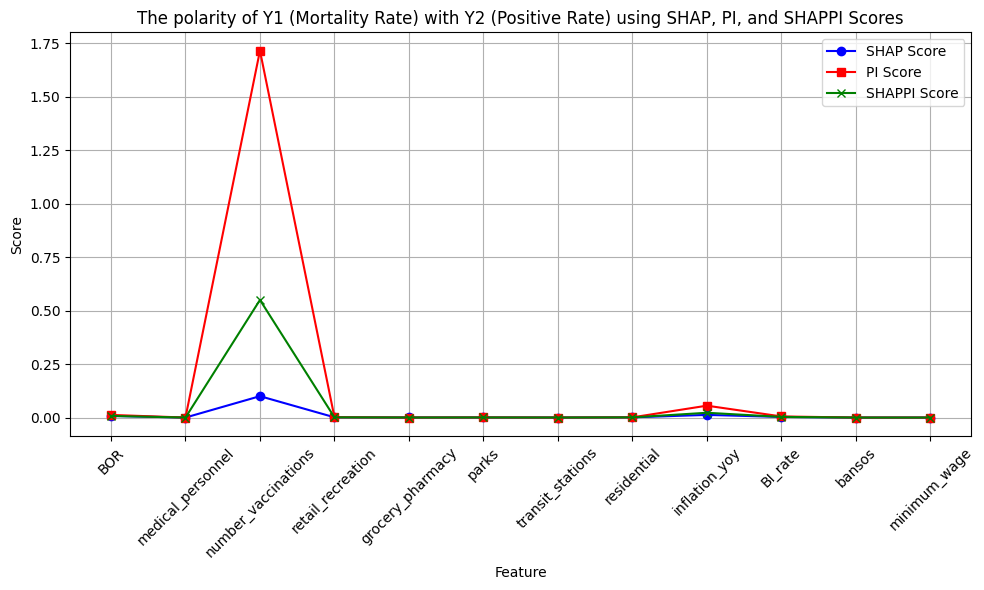

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y2, "The polarity of Y1 (Mortality Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


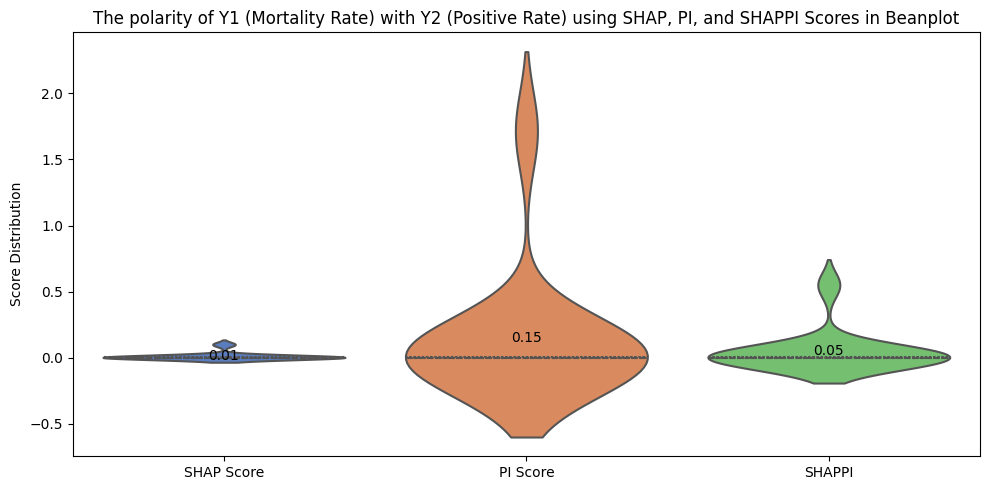

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y2, "The polarity of Y1 (Mortality Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y3:")
pol_anal_Y1_Y3, perm_imp_Y1_Y3 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y3, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y3:
---------------------------------------------------------------
Mean =  [7.02394620e-02 1.16703130e-04 9.08391416e-01 1.03507675e-02
 2.75337650e-03 4.59032226e-03 1.77873345e-03 9.48688108e-03
 1.12466402e-01 2.67186742e-02 0.00000000e+00 0.00000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y3:")
shappi_Y1_Y3 = analysis_SHAPPI(pol_anal_Y1_Y3, perm_imp_Y1_Y3)
shappi_Y1_Y3

Analysis SHAPPI Y1 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061613e-03  0.022373
0                   BOR  Positive  3.771384e-04  0.007458
9               BI_rate  Positive  1.435698e-04  0.002984
3     retail_recreation  Positive  1.277434e-04  0.000965
7           residential  Positive  4.675914e-05  0.000794
5                 parks  Positive  2.813628e-05  0.000394
4      grocery_pharmacy  Positive  2.412054e-05  0.000201
6      transit_stations  Positive  3.847482e-06  0.000128
1     medical_personnel  Positive  1.451854e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y3

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007732  Positive  1.232555e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.218241e-07   
2   number_vaccinations     -0.011818    0.100000  Positive  1.715813e+00   
3     retail_recreation      0.000552    0.001139  Positive  1.355943e-03   
4      grocery_pharmacy     -0.001459    0.000303  Positive  1.703339e-04   
5                 parks      0.000309    0.000505  Positive  4.853006e-04   
6      transit_stations      0.000936    0.000196  Positive  1.026385e-04   
7           residential     -0.002383    0.001044  Positive  9.325183e-04   
8         inflation_yoy     -0.002471    0.012381  Positive  5.553193e-02   
9               BI_rate      0.010248    0.002941  Positive  5.192247e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771384e-04  0.007458  
1   1.451854e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.277434e-04  0.000965  
4   2.412054e-05  0.000201  
5   2.813628e-05  0.000394  
6   3.847482e-06  0.000128  
7   4.675914e-05  0.000794  
8   3.061613e-03  0.022373  
9   1.435698e-04  0.002984  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

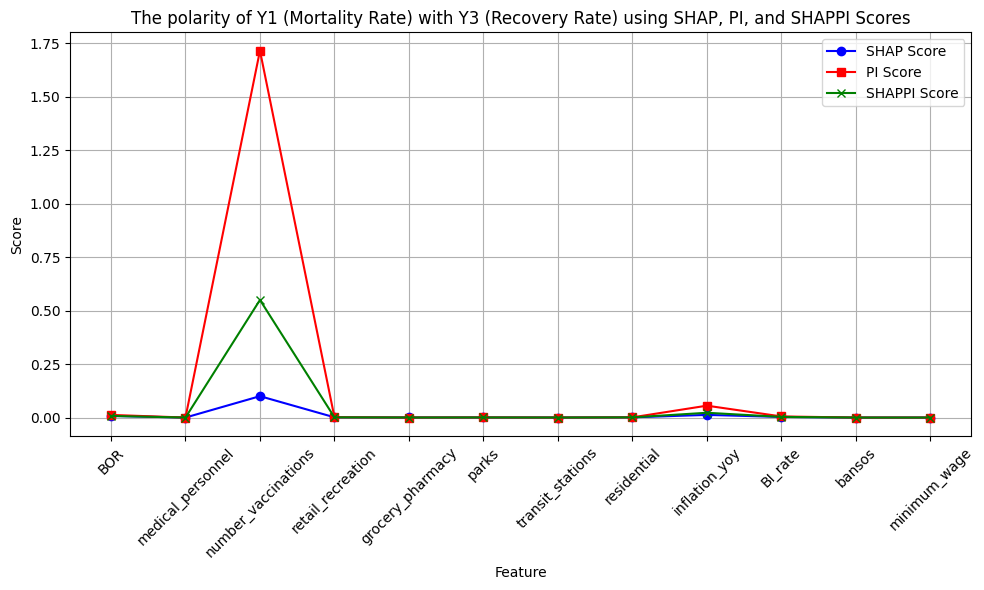

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y3, "The polarity of Y1 (Mortality Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


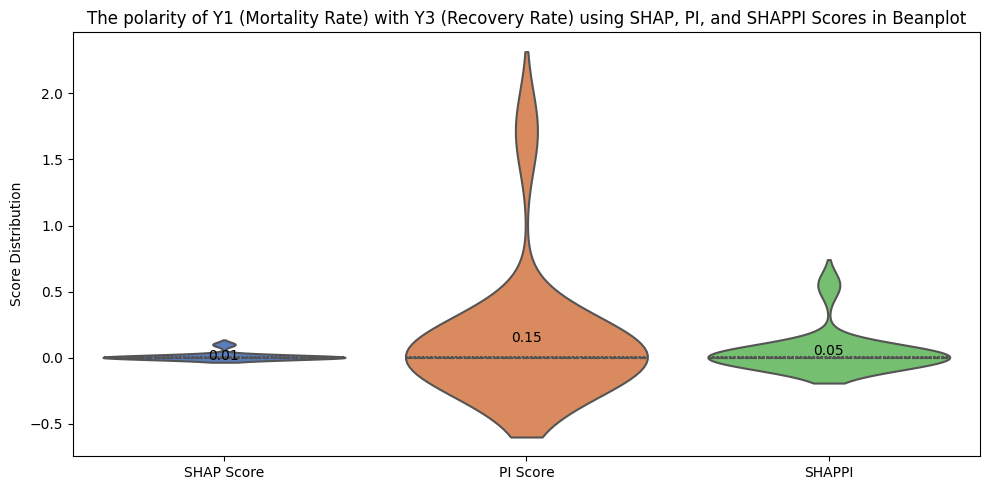

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y3, "The polarity of Y1 (Mortality Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y4:")
pol_anal_Y1_Y4, perm_imp_Y1_Y4 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y4, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y4:
---------------------------------------------------------------
Mean =  [7.02394620e-02 1.16703130e-04 9.08391416e-01 1.03507675e-02
 2.75337650e-03 4.59032226e-03 1.77873345e-03 9.48688108e-03
 1.12466402e-01 2.67186742e-02 0.00000000e+00 0.00000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y4:")
shappi_Y1_Y4 = analysis_SHAPPI(pol_anal_Y1_Y4, perm_imp_Y1_Y4)
shappi_Y1_Y4

Analysis SHAPPI Y1 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061613e-03  0.022373
0                   BOR  Positive  3.771384e-04  0.007458
9               BI_rate  Positive  1.435698e-04  0.002984
3     retail_recreation  Positive  1.277434e-04  0.000965
7           residential  Positive  4.675914e-05  0.000794
5                 parks  Positive  2.813628e-05  0.000394
4      grocery_pharmacy  Positive  2.412054e-05  0.000201
6      transit_stations  Positive  3.847482e-06  0.000128
1     medical_personnel  Positive  1.451854e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y4

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007732  Positive  1.232555e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.218241e-07   
2   number_vaccinations     -0.011818    0.100000  Positive  1.715813e+00   
3     retail_recreation      0.000552    0.001139  Positive  1.355943e-03   
4      grocery_pharmacy     -0.001459    0.000303  Positive  1.703339e-04   
5                 parks      0.000309    0.000505  Positive  4.853006e-04   
6      transit_stations      0.000936    0.000196  Positive  1.026385e-04   
7           residential     -0.002383    0.001044  Positive  9.325183e-04   
8         inflation_yoy     -0.002471    0.012381  Positive  5.553193e-02   
9               BI_rate      0.010248    0.002941  Positive  5.192247e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771384e-04  0.007458  
1   1.451854e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.277434e-04  0.000965  
4   2.412054e-05  0.000201  
5   2.813628e-05  0.000394  
6   3.847482e-06  0.000128  
7   4.675914e-05  0.000794  
8   3.061613e-03  0.022373  
9   1.435698e-04  0.002984  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

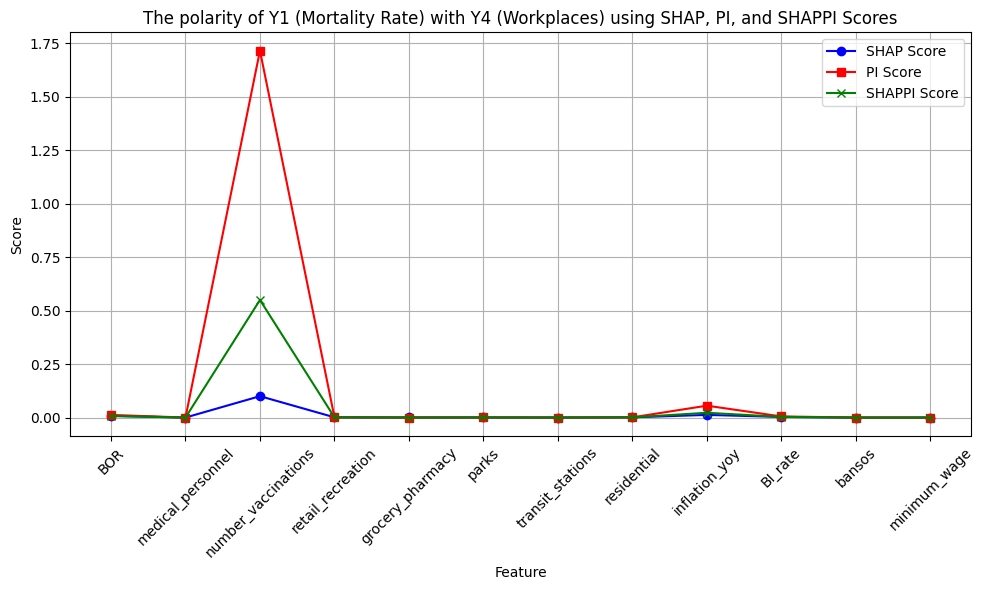

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y4, "The polarity of Y1 (Mortality Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


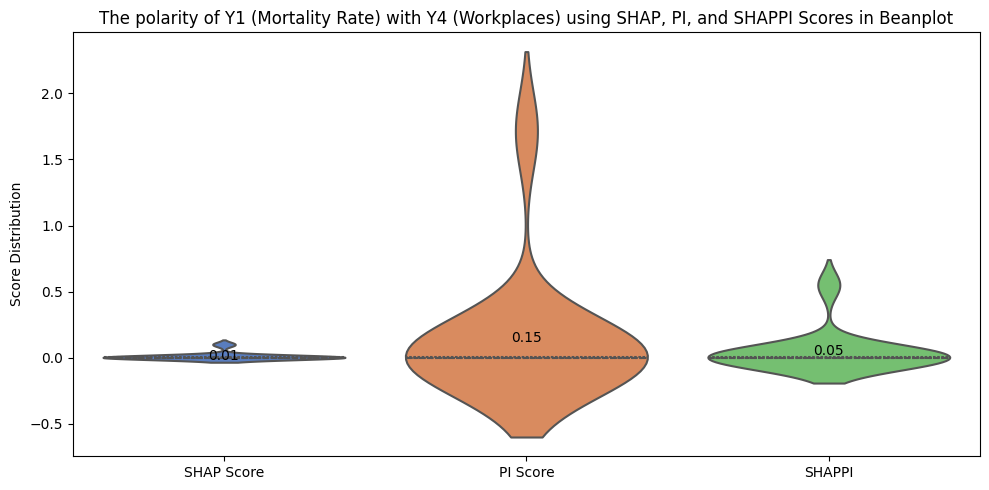

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y4, "The polarity of Y1 (Mortality Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y5:")
pol_anal_Y1_Y5, perm_imp_Y1_Y5 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y5, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y5:
---------------------------------------------------------------
Mean =  [7.02394620e-02 1.16703130e-04 9.08391416e-01 1.03507675e-02
 2.75337650e-03 4.59032226e-03 1.77873345e-03 9.48688108e-03
 1.12466402e-01 2.67186742e-02 0.00000000e+00 0.00000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y5:")
shappi_Y1_Y5 = analysis_SHAPPI(pol_anal_Y1_Y5, perm_imp_Y1_Y5)
shappi_Y1_Y5

Analysis SHAPPI Y1 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061613e-03  0.022373
0                   BOR  Positive  3.771384e-04  0.007458
9               BI_rate  Positive  1.435698e-04  0.002984
3     retail_recreation  Positive  1.277434e-04  0.000965
7           residential  Positive  4.675914e-05  0.000794
5                 parks  Positive  2.813628e-05  0.000394
4      grocery_pharmacy  Positive  2.412054e-05  0.000201
6      transit_stations  Positive  3.847482e-06  0.000128
1     medical_personnel  Positive  1.451854e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y5

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007732  Positive  1.232555e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.218241e-07   
2   number_vaccinations     -0.011818    0.100000  Positive  1.715813e+00   
3     retail_recreation      0.000552    0.001139  Positive  1.355943e-03   
4      grocery_pharmacy     -0.001459    0.000303  Positive  1.703339e-04   
5                 parks      0.000309    0.000505  Positive  4.853006e-04   
6      transit_stations      0.000936    0.000196  Positive  1.026385e-04   
7           residential     -0.002383    0.001044  Positive  9.325183e-04   
8         inflation_yoy     -0.002471    0.012381  Positive  5.553193e-02   
9               BI_rate      0.010248    0.002941  Positive  5.192247e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771384e-04  0.007458  
1   1.451854e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.277434e-04  0.000965  
4   2.412054e-05  0.000201  
5   2.813628e-05  0.000394  
6   3.847482e-06  0.000128  
7   4.675914e-05  0.000794  
8   3.061613e-03  0.022373  
9   1.435698e-04  0.002984  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

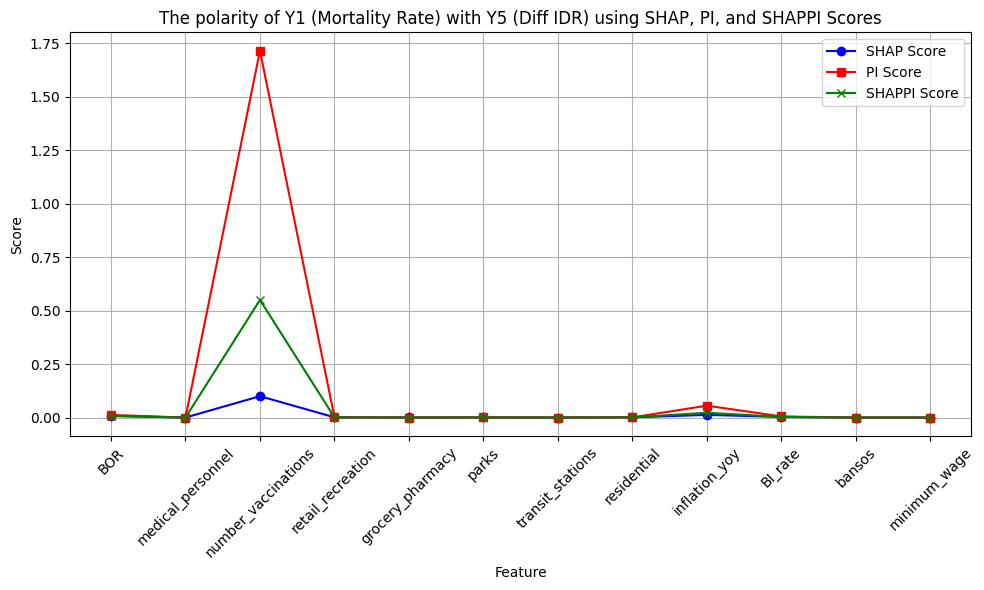

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y5, "The polarity of Y1 (Mortality Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


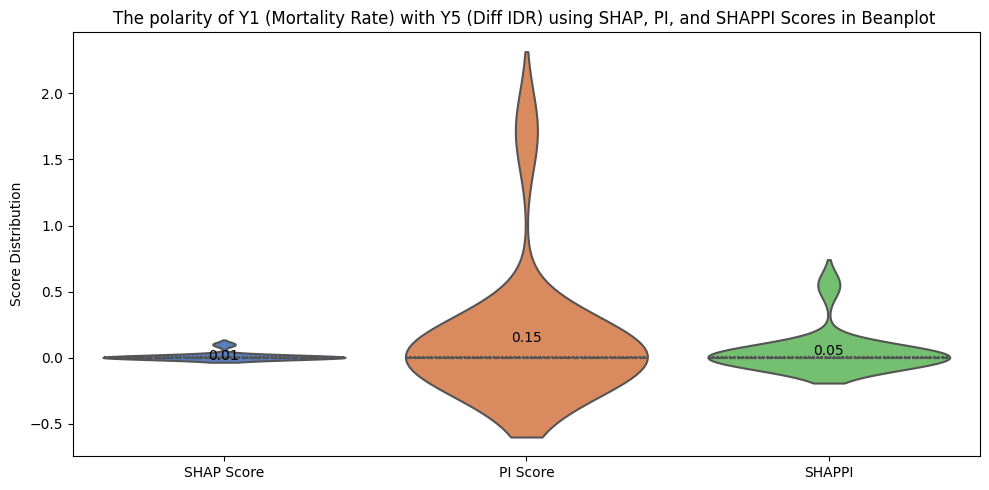

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y5, "The polarity of Y1 (Mortality Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot ")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y6:")
pol_anal_Y1_Y6, perm_imp_Y1_Y6 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y6, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y6:
---------------------------------------------------------------
Mean =  [7.02394620e-02 1.16703130e-04 9.08391416e-01 1.03507675e-02
 2.75337650e-03 4.59032226e-03 1.77873345e-03 9.48688108e-03
 1.12466402e-01 2.67186742e-02 0.00000000e+00 0.00000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y6:")
shappi_Y1_Y6 = analysis_SHAPPI(pol_anal_Y1_Y6, perm_imp_Y1_Y6)
shappi_Y1_Y6

Analysis SHAPPI Y1 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061613e-03  0.022373
0                   BOR  Positive  3.771384e-04  0.007458
9               BI_rate  Positive  1.435698e-04  0.002984
3     retail_recreation  Positive  1.277434e-04  0.000965
7           residential  Positive  4.675914e-05  0.000794
5                 parks  Positive  2.813628e-05  0.000394
4      grocery_pharmacy  Positive  2.412054e-05  0.000201
6      transit_stations  Positive  3.847482e-06  0.000128
1     medical_personnel  Positive  1.451854e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y6

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007732  Positive  1.232555e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.218241e-07   
2   number_vaccinations     -0.011818    0.100000  Positive  1.715813e+00   
3     retail_recreation      0.000552    0.001139  Positive  1.355943e-03   
4      grocery_pharmacy     -0.001459    0.000303  Positive  1.703339e-04   
5                 parks      0.000309    0.000505  Positive  4.853006e-04   
6      transit_stations      0.000936    0.000196  Positive  1.026385e-04   
7           residential     -0.002383    0.001044  Positive  9.325183e-04   
8         inflation_yoy     -0.002471    0.012381  Positive  5.553193e-02   
9               BI_rate      0.010248    0.002941  Positive  5.192247e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771384e-04  0.007458  
1   1.451854e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.277434e-04  0.000965  
4   2.412054e-05  0.000201  
5   2.813628e-05  0.000394  
6   3.847482e-06  0.000128  
7   4.675914e-05  0.000794  
8   3.061613e-03  0.022373  
9   1.435698e-04  0.002984  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

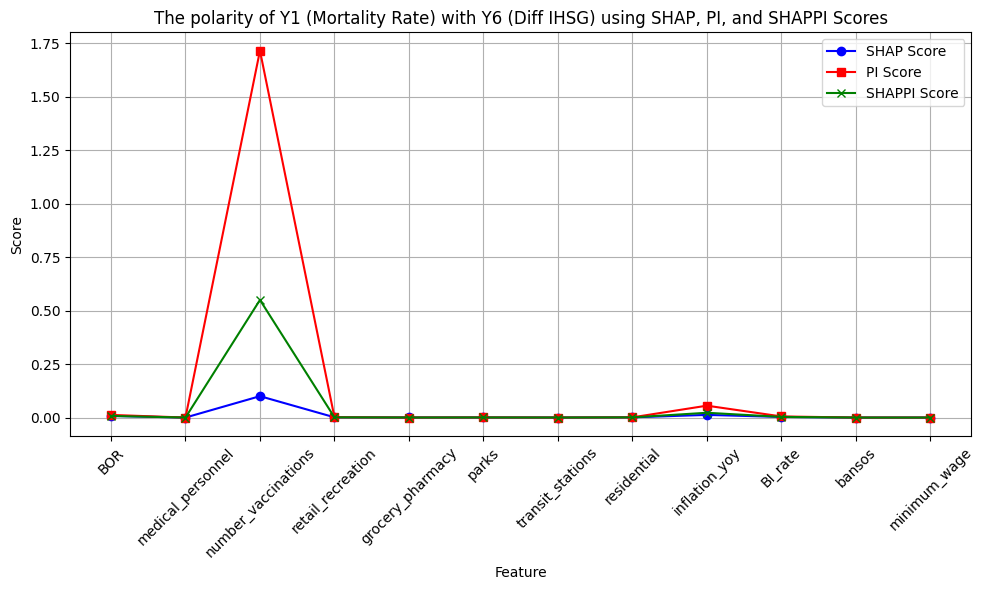

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y6, "The polarity of Y1 (Mortality Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


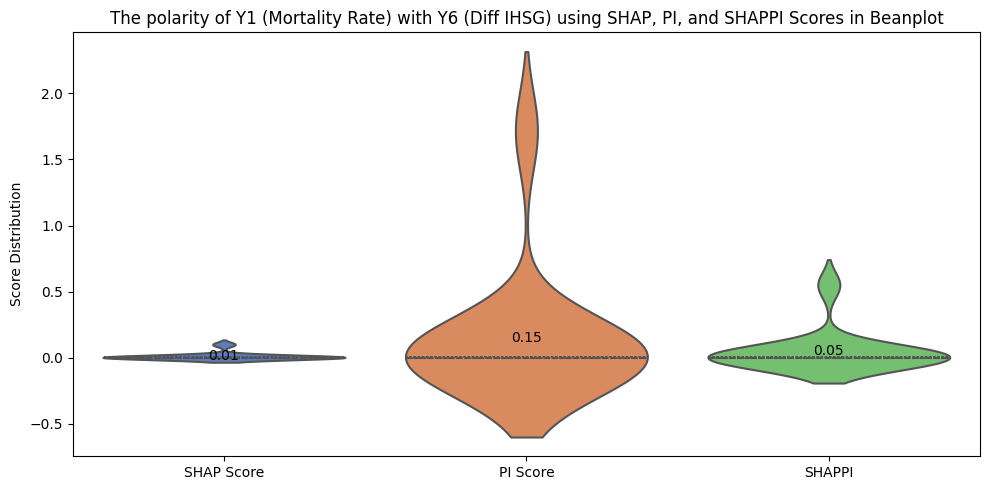

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y6, "The polarity of Y1 (Mortality Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y1:")
pol_anal_Y2_Y1, perm_imp_Y2_Y1 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y1, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y1:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1862981e-04 4.8670724e-01 2.5603773e-02 6.9399156e-02
 2.5373284e-02 4.6517517e-02 3.2997124e-02 5.0226015e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y1:")
shappi_Y2_Y1 = analysis_SHAPPI(pol_anal_Y2_Y1, perm_imp_Y2_Y1)
shappi_Y2_Y1

Analysis SHAPPI Y2 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.665686e-02  0.548452
8         inflation_yoy  Positive  5.674341e-02  0.379074
0                   BOR  Positive  4.615025e-03  0.016723
6      transit_stations  Positive  5.711794e-03  0.016423
7           residential  Positive  2.353355e-03  0.014912
4      grocery_pharmacy  Positive  3.415801e-03  0.012987
5                 parks  Positive  1.402308e-03  0.007399
3     retail_recreation  Positive  8.624910e-04  0.005387
9               BI_rate  Positive  1.093953e-03  0.005093
1     medical_personnel  Positive  1.095624e-06  0.000033
10               bansos  Positive  5.692960e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000183    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096903  Positive  1.750084   
3     retail_recreation      0.000250    0.005098  Positive  0.009935   
4      grocery_pharmacy     -0.009043    0.013817  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017057   
6      transit_stations     -0.005807    0.009262  Positive  0.041274   
7           residential     -0.006278    0.006570  Positive  0.040696   
8         inflation_yoy      0.180789    0.100000  Positive  1.151816   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615025e-03  0.016723  
1   1.095624e-06  0.000033  
2   8.665686e-02  0.548452  
3   8.624910e-04  0.005387  
4   3.415801e-03  0.012987  
5   1.402308e-03  0.007399  
6   5.711794e-03  0.016423  
7   2.353355e-03  0.014912  
8   5.674341e-02  0.379074  
9   1.093953e-03  0.005093  
10  5.692960e-07  0.000004  
11  0.000000e+00  0.000000

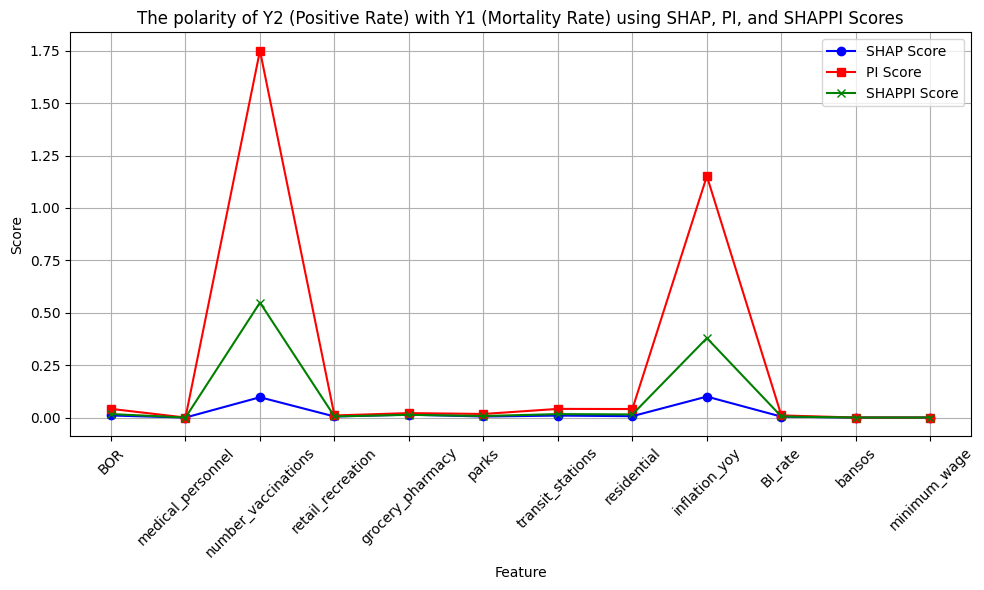

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y1, "The polarity of Y2 (Positive Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


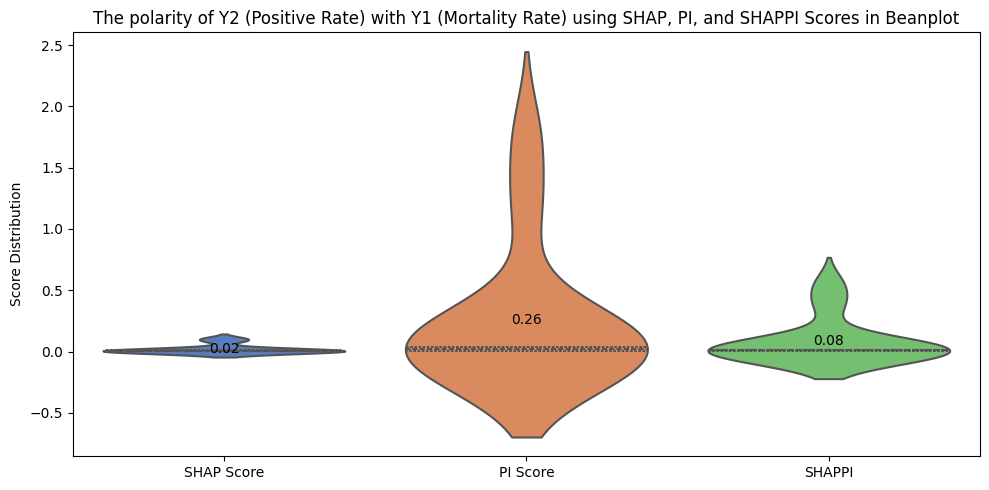

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y1, "The polarity of Y2 (Positive Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y3:")
pol_anal_Y2_Y3, perm_imp_Y2_Y3 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y3, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y3:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1862981e-04 4.8670724e-01 2.5603773e-02 6.9399156e-02
 2.5373284e-02 4.6517517e-02 3.2997124e-02 5.0226015e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y3:")
shappi_Y2_Y3 = analysis_SHAPPI(pol_anal_Y2_Y3, perm_imp_Y2_Y3)
shappi_Y2_Y3

Analysis SHAPPI Y2 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.665686e-02  0.548452
8         inflation_yoy  Positive  5.674341e-02  0.379074
0                   BOR  Positive  4.615025e-03  0.016723
6      transit_stations  Positive  5.711794e-03  0.016423
7           residential  Positive  2.353355e-03  0.014912
4      grocery_pharmacy  Positive  3.415801e-03  0.012987
5                 parks  Positive  1.402308e-03  0.007399
3     retail_recreation  Positive  8.624910e-04  0.005387
9               BI_rate  Positive  1.093953e-03  0.005093
1     medical_personnel  Positive  1.095624e-06  0.000033
10               bansos  Positive  5.692960e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000183    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096903  Positive  1.750084   
3     retail_recreation      0.000250    0.005098  Positive  0.009935   
4      grocery_pharmacy     -0.009043    0.013817  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017057   
6      transit_stations     -0.005807    0.009262  Positive  0.041274   
7           residential     -0.006278    0.006570  Positive  0.040696   
8         inflation_yoy      0.180789    0.100000  Positive  1.151816   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615025e-03  0.016723  
1   1.095624e-06  0.000033  
2   8.665686e-02  0.548452  
3   8.624910e-04  0.005387  
4   3.415801e-03  0.012987  
5   1.402308e-03  0.007399  
6   5.711794e-03  0.016423  
7   2.353355e-03  0.014912  
8   5.674341e-02  0.379074  
9   1.093953e-03  0.005093  
10  5.692960e-07  0.000004  
11  0.000000e+00  0.000000

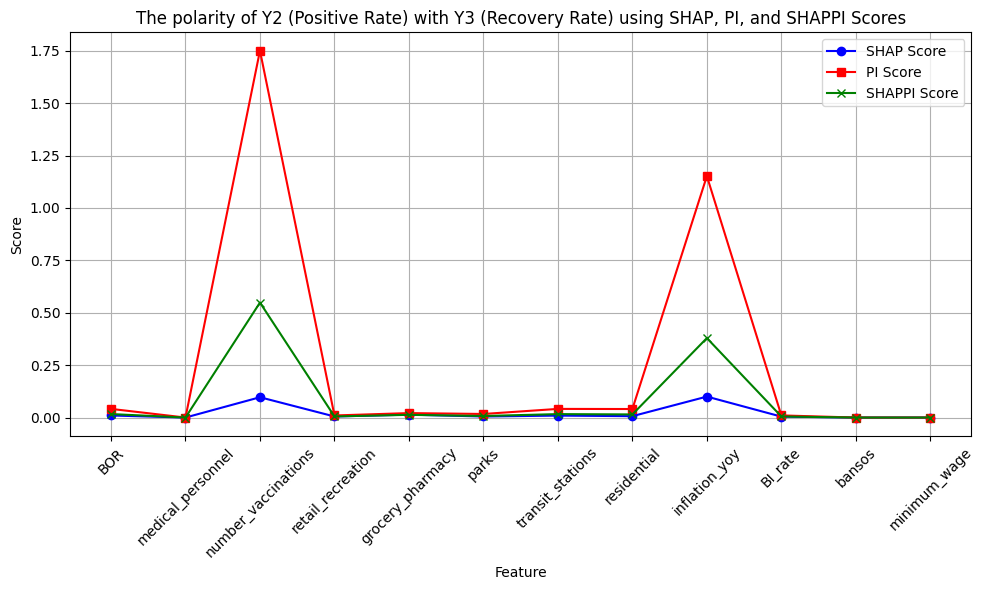

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y3, "The polarity of Y2 (Positive Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


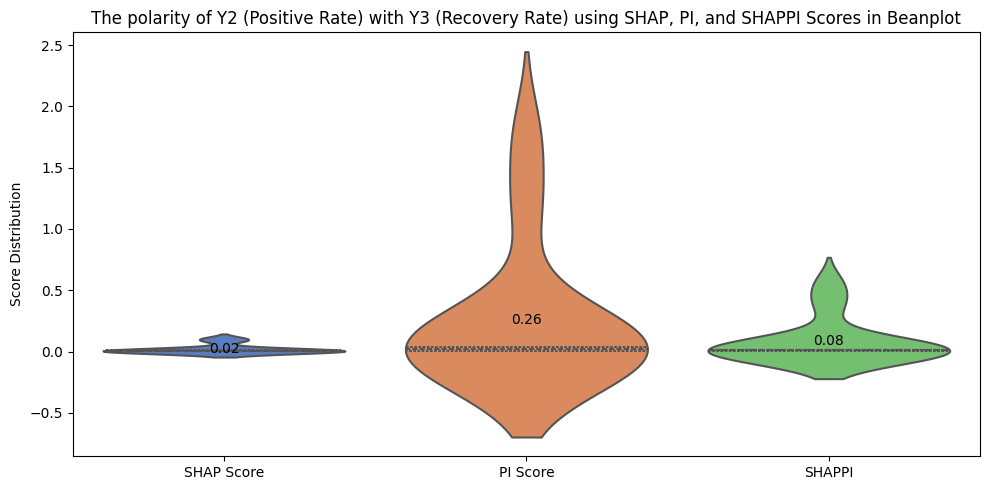

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y3, "The polarity of Y2 (Positive Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y4:")
pol_anal_Y2_Y4, perm_imp_Y2_Y4 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y4, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y4:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1862981e-04 4.8670724e-01 2.5603773e-02 6.9399156e-02
 2.5373284e-02 4.6517517e-02 3.2997124e-02 5.0226015e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y4:")
shappi_Y2_Y4 = analysis_SHAPPI(pol_anal_Y2_Y4, perm_imp_Y2_Y4)
shappi_Y2_Y4

Analysis SHAPPI Y2 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.665686e-02  0.548452
8         inflation_yoy  Positive  5.674341e-02  0.379074
0                   BOR  Positive  4.615025e-03  0.016723
6      transit_stations  Positive  5.711794e-03  0.016423
7           residential  Positive  2.353355e-03  0.014912
4      grocery_pharmacy  Positive  3.415801e-03  0.012987
5                 parks  Positive  1.402308e-03  0.007399
3     retail_recreation  Positive  8.624910e-04  0.005387
9               BI_rate  Positive  1.093953e-03  0.005093
1     medical_personnel  Positive  1.095624e-06  0.000033
10               bansos  Positive  5.692960e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000183    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096903  Positive  1.750084   
3     retail_recreation      0.000250    0.005098  Positive  0.009935   
4      grocery_pharmacy     -0.009043    0.013817  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017057   
6      transit_stations     -0.005807    0.009262  Positive  0.041274   
7           residential     -0.006278    0.006570  Positive  0.040696   
8         inflation_yoy      0.180789    0.100000  Positive  1.151816   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615025e-03  0.016723  
1   1.095624e-06  0.000033  
2   8.665686e-02  0.548452  
3   8.624910e-04  0.005387  
4   3.415801e-03  0.012987  
5   1.402308e-03  0.007399  
6   5.711794e-03  0.016423  
7   2.353355e-03  0.014912  
8   5.674341e-02  0.379074  
9   1.093953e-03  0.005093  
10  5.692960e-07  0.000004  
11  0.000000e+00  0.000000

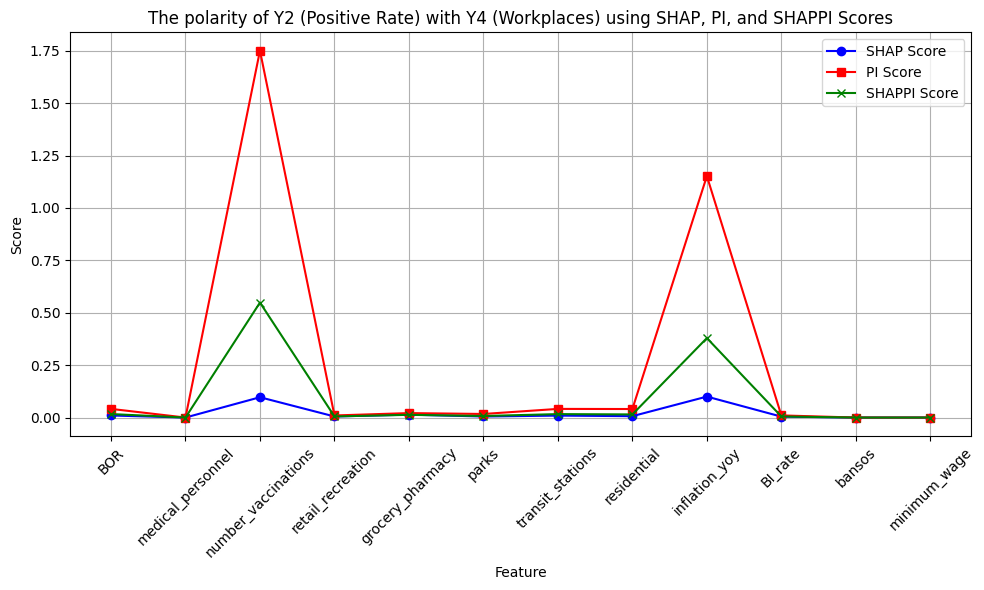

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y4, "The polarity of Y2 (Positive Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


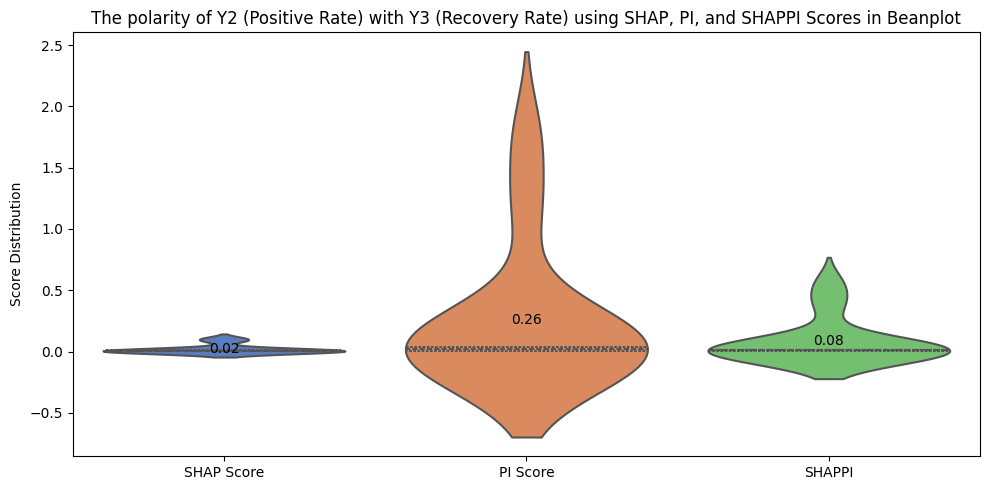

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y4, "The polarity of Y2 (Positive Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y5:")
pol_anal_Y2_Y5, perm_imp_Y2_Y5 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y5, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y5:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1862981e-04 4.8670724e-01 2.5603773e-02 6.9399156e-02
 2.5373284e-02 4.6517517e-02 3.2997124e-02 5.0226015e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y5:")
shappi_Y2_Y5 = analysis_SHAPPI(pol_anal_Y2_Y5, perm_imp_Y2_Y5)
shappi_Y2_Y5

Analysis SHAPPI Y2 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.665686e-02  0.548452
8         inflation_yoy  Positive  5.674341e-02  0.379074
0                   BOR  Positive  4.615025e-03  0.016723
6      transit_stations  Positive  5.711794e-03  0.016423
7           residential  Positive  2.353355e-03  0.014912
4      grocery_pharmacy  Positive  3.415801e-03  0.012987
5                 parks  Positive  1.402308e-03  0.007399
3     retail_recreation  Positive  8.624910e-04  0.005387
9               BI_rate  Positive  1.093953e-03  0.005093
1     medical_personnel  Positive  1.095624e-06  0.000033
10               bansos  Positive  5.692960e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000183    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096903  Positive  1.750084   
3     retail_recreation      0.000250    0.005098  Positive  0.009935   
4      grocery_pharmacy     -0.009043    0.013817  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017057   
6      transit_stations     -0.005807    0.009262  Positive  0.041274   
7           residential     -0.006278    0.006570  Positive  0.040696   
8         inflation_yoy      0.180789    0.100000  Positive  1.151816   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615025e-03  0.016723  
1   1.095624e-06  0.000033  
2   8.665686e-02  0.548452  
3   8.624910e-04  0.005387  
4   3.415801e-03  0.012987  
5   1.402308e-03  0.007399  
6   5.711794e-03  0.016423  
7   2.353355e-03  0.014912  
8   5.674341e-02  0.379074  
9   1.093953e-03  0.005093  
10  5.692960e-07  0.000004  
11  0.000000e+00  0.000000

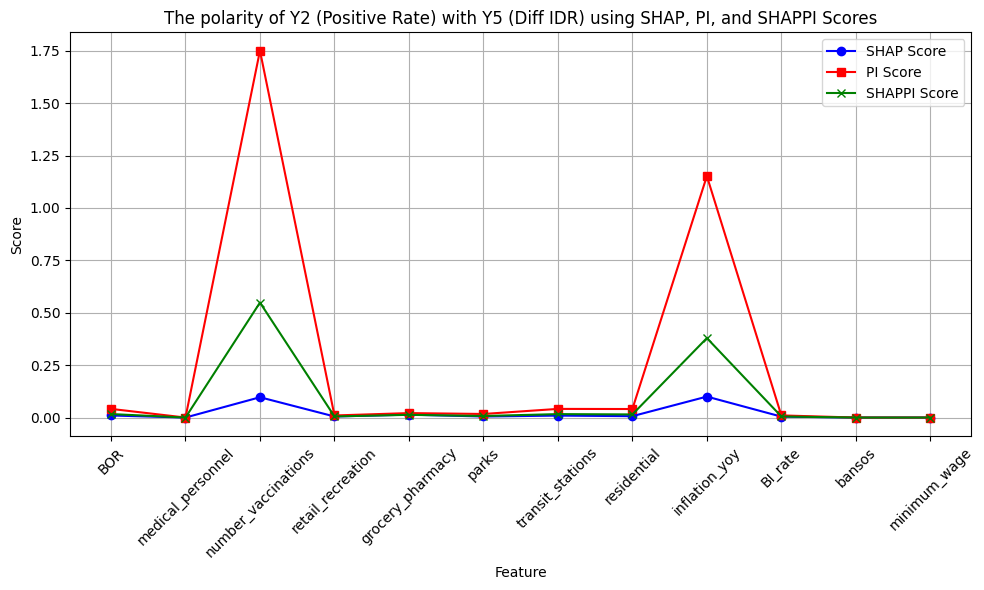

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y5, "The polarity of Y2 (Positive Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


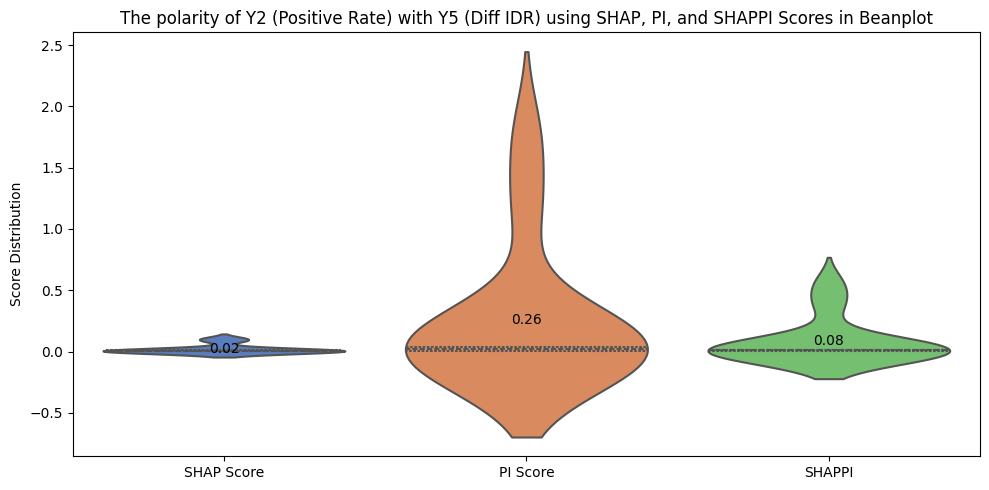

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y5, "The polarity of Y2 (Positive Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y6:")
pol_anal_Y2_Y6, perm_imp_Y2_Y6 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y6, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y6:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1862981e-04 4.8670724e-01 2.5603773e-02 6.9399156e-02
 2.5373284e-02 4.6517517e-02 3.2997124e-02 5.0226015e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y6:")
shappi_Y2_Y6 = analysis_SHAPPI(pol_anal_Y2_Y6, perm_imp_Y2_Y6)
shappi_Y2_Y6

Analysis SHAPPI Y2 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.665686e-02  0.548452
8         inflation_yoy  Positive  5.674341e-02  0.379074
0                   BOR  Positive  4.615025e-03  0.016723
6      transit_stations  Positive  5.711794e-03  0.016423
7           residential  Positive  2.353355e-03  0.014912
4      grocery_pharmacy  Positive  3.415801e-03  0.012987
5                 parks  Positive  1.402308e-03  0.007399
3     retail_recreation  Positive  8.624910e-04  0.005387
9               BI_rate  Positive  1.093953e-03  0.005093
1     medical_personnel  Positive  1.095624e-06  0.000033
10               bansos  Positive  5.692960e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000183    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096903  Positive  1.750084   
3     retail_recreation      0.000250    0.005098  Positive  0.009935   
4      grocery_pharmacy     -0.009043    0.013817  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017057   
6      transit_stations     -0.005807    0.009262  Positive  0.041274   
7           residential     -0.006278    0.006570  Positive  0.040696   
8         inflation_yoy      0.180789    0.100000  Positive  1.151816   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615025e-03  0.016723  
1   1.095624e-06  0.000033  
2   8.665686e-02  0.548452  
3   8.624910e-04  0.005387  
4   3.415801e-03  0.012987  
5   1.402308e-03  0.007399  
6   5.711794e-03  0.016423  
7   2.353355e-03  0.014912  
8   5.674341e-02  0.379074  
9   1.093953e-03  0.005093  
10  5.692960e-07  0.000004  
11  0.000000e+00  0.000000

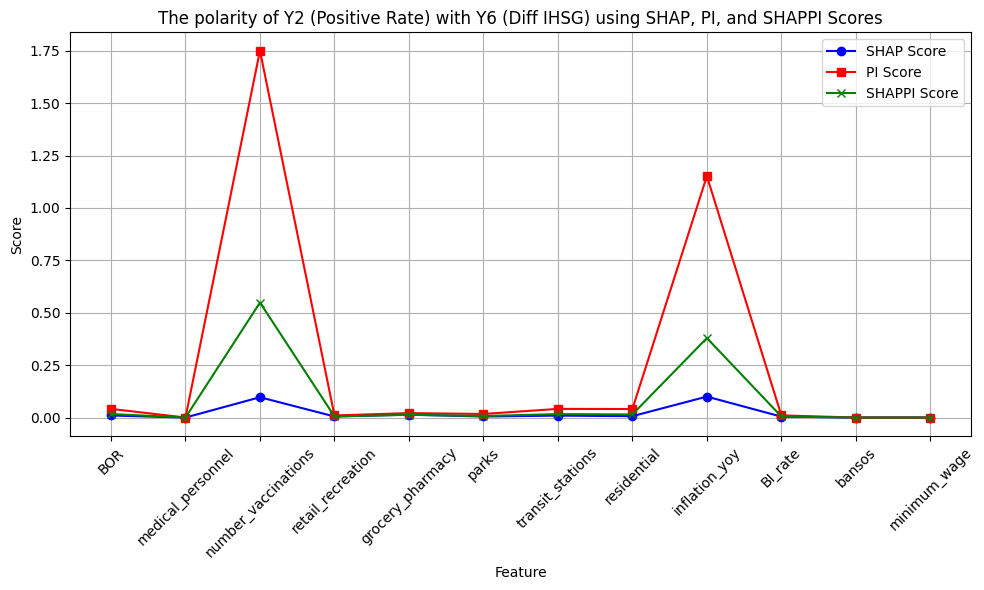

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y6, "The polarity of Y2 (Positive Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


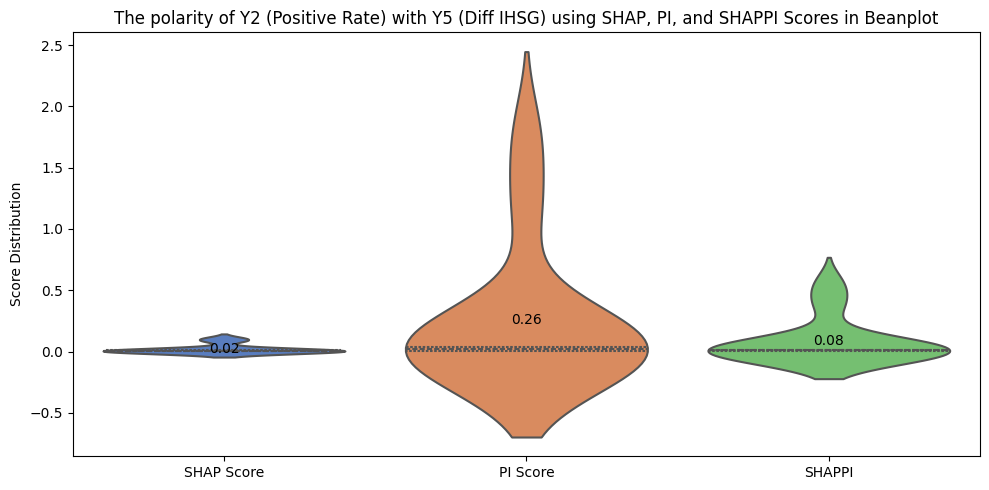

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y6, "The polarity of Y2 (Positive Rate) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y1:")
pol_anal_Y3_Y1, perm_imp_Y3_Y1 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y1, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y1:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y1:")
shappi_Y3_Y1 = analysis_SHAPPI(pol_anal_Y3_Y1, perm_imp_Y3_Y1)
shappi_Y3_Y1

Analysis SHAPPI Y3 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023703e-03  0.010401
0                   BOR  Positive  6.781671e-04  0.008219
9               BI_rate  Positive  1.769553e-04  0.002700
3     retail_recreation  Positive  2.419525e-04  0.001009
5                 parks  Positive  1.178646e-05  0.000247
6      transit_stations  Positive  1.360259e-05  0.000225
4      grocery_pharmacy  Positive  9.184399e-06  0.000135
7           residential  Positive  5.190901e-06  0.000072
1     medical_personnel  Positive  9.845361e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y1

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408669e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.261531e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857285e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053416e-04   
5                 parks      0.000247    0.000352  Positive  2.493000e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587329e-04   
7           residential     -0.000118    0.000117  Positive  4.576193e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099907e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781671e-04  0.008219  
1   9.845361e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419525e-04  0.001009  
4   9.184399e-06  0.000135  
5   1.178646e-05  0.000247  
6   1.360259e-05  0.000225  
7   5.190901e-06  0.000072  
8   1.023703e-03  0.010401  
9   1.769553e-04  0.002700  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

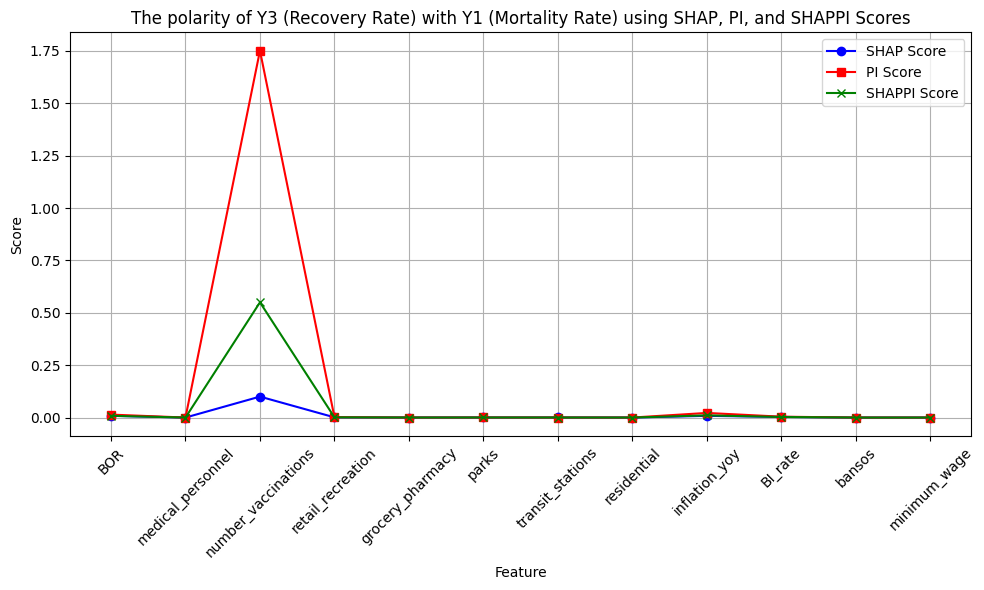

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y1, "The polarity of Y3 (Recovery Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


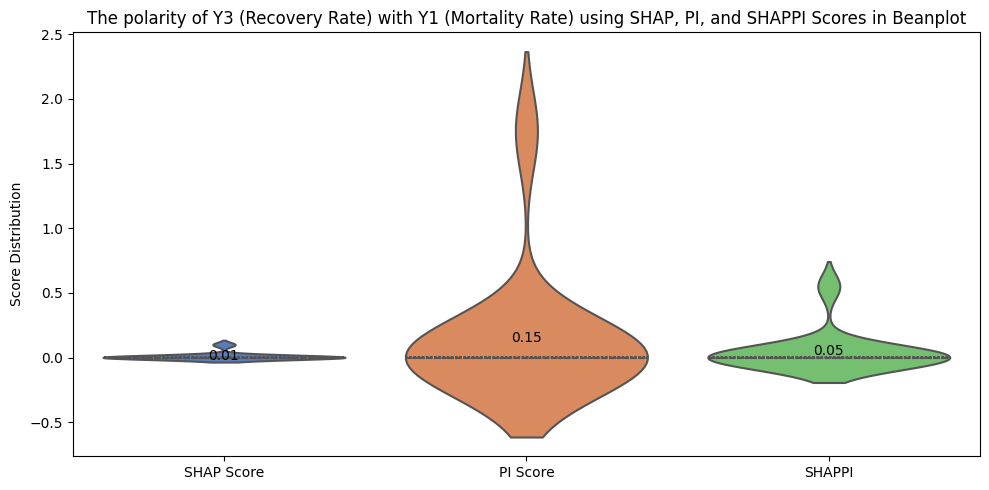

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y1, "The polarity of Y3 (Recovery Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y2:")
pol_anal_Y3_Y2, perm_imp_Y3_Y2 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y2, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y2:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y2:")
shappi_Y3_Y2 = analysis_SHAPPI(pol_anal_Y3_Y2, perm_imp_Y3_Y2)
shappi_Y3_Y2

Analysis SHAPPI Y3 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023703e-03  0.010401
0                   BOR  Positive  6.781671e-04  0.008219
9               BI_rate  Positive  1.769553e-04  0.002700
3     retail_recreation  Positive  2.419525e-04  0.001009
5                 parks  Positive  1.178646e-05  0.000247
6      transit_stations  Positive  1.360259e-05  0.000225
4      grocery_pharmacy  Positive  9.184399e-06  0.000135
7           residential  Positive  5.190901e-06  0.000072
1     medical_personnel  Positive  9.845361e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y2

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408669e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.261531e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857285e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053416e-04   
5                 parks      0.000247    0.000352  Positive  2.493000e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587329e-04   
7           residential     -0.000118    0.000117  Positive  4.576193e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099907e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781671e-04  0.008219  
1   9.845361e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419525e-04  0.001009  
4   9.184399e-06  0.000135  
5   1.178646e-05  0.000247  
6   1.360259e-05  0.000225  
7   5.190901e-06  0.000072  
8   1.023703e-03  0.010401  
9   1.769553e-04  0.002700  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

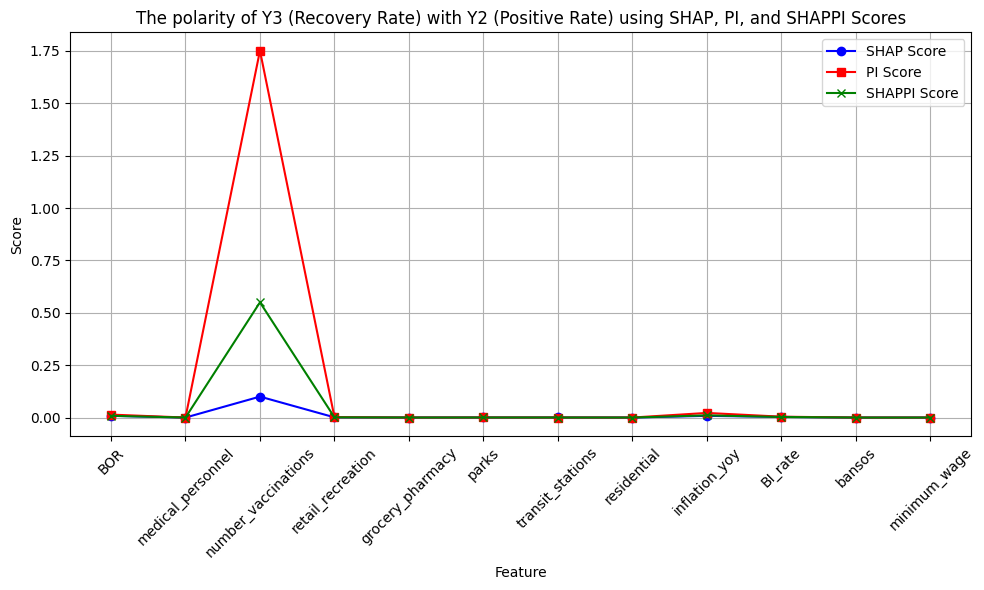

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y2, "The polarity of Y3 (Recovery Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


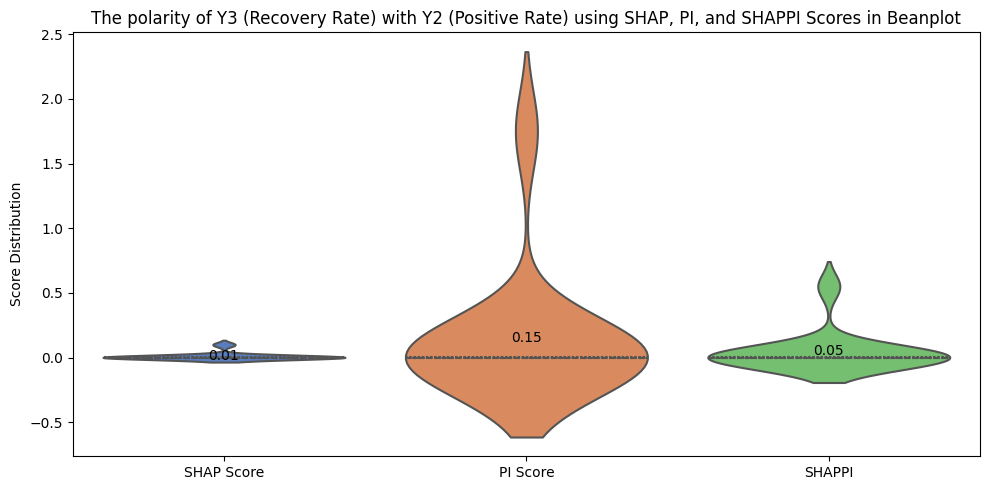

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y2, "The polarity of Y3 (Recovery Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y4:")
pol_anal_Y3_Y4, perm_imp_Y3_Y4 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y4, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y4:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y4:")
shappi_Y3_Y4 = analysis_SHAPPI(pol_anal_Y3_Y4, perm_imp_Y3_Y4)
shappi_Y3_Y4

Analysis SHAPPI Y3 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023703e-03  0.010401
0                   BOR  Positive  6.781671e-04  0.008219
9               BI_rate  Positive  1.769553e-04  0.002700
3     retail_recreation  Positive  2.419525e-04  0.001009
5                 parks  Positive  1.178646e-05  0.000247
6      transit_stations  Positive  1.360259e-05  0.000225
4      grocery_pharmacy  Positive  9.184399e-06  0.000135
7           residential  Positive  5.190901e-06  0.000072
1     medical_personnel  Positive  9.845361e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y4

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408669e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.261531e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857285e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053416e-04   
5                 parks      0.000247    0.000352  Positive  2.493000e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587329e-04   
7           residential     -0.000118    0.000117  Positive  4.576193e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099907e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781671e-04  0.008219  
1   9.845361e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419525e-04  0.001009  
4   9.184399e-06  0.000135  
5   1.178646e-05  0.000247  
6   1.360259e-05  0.000225  
7   5.190901e-06  0.000072  
8   1.023703e-03  0.010401  
9   1.769553e-04  0.002700  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

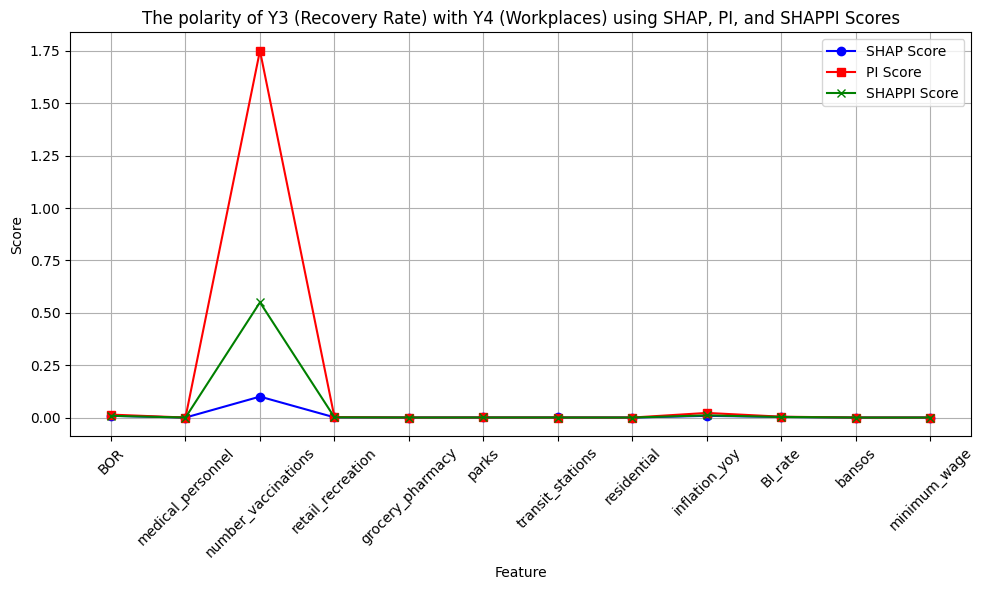

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y4, "The polarity of Y3 (Recovery Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


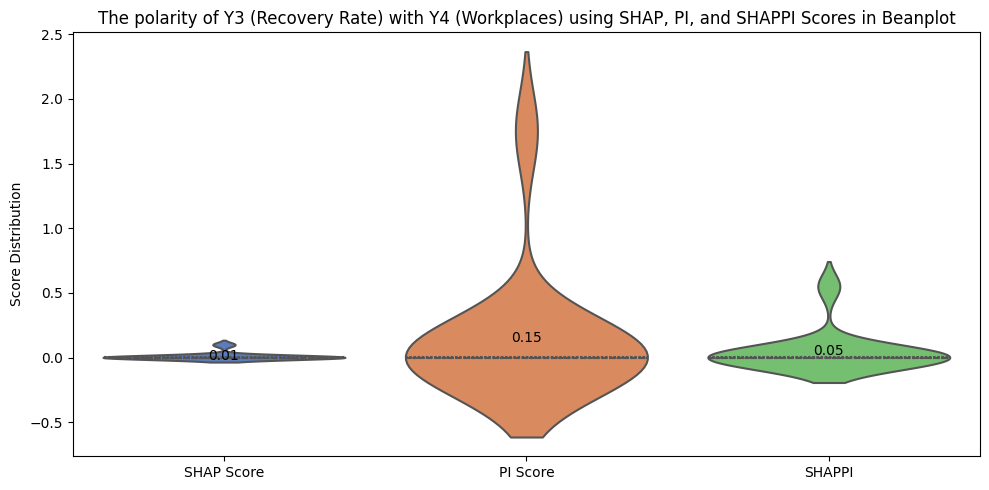

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y4, "The polarity of Y3 (Recovery Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y5:")
pol_anal_Y3_Y5, perm_imp_Y3_Y5 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y5, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y5:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y5:")
shappi_Y3_Y5 = analysis_SHAPPI(pol_anal_Y3_Y5, perm_imp_Y3_Y5)
shappi_Y3_Y5

Analysis SHAPPI Y3 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023703e-03  0.010401
0                   BOR  Positive  6.781671e-04  0.008219
9               BI_rate  Positive  1.769553e-04  0.002700
3     retail_recreation  Positive  2.419525e-04  0.001009
5                 parks  Positive  1.178646e-05  0.000247
6      transit_stations  Positive  1.360259e-05  0.000225
4      grocery_pharmacy  Positive  9.184399e-06  0.000135
7           residential  Positive  5.190901e-06  0.000072
1     medical_personnel  Positive  9.845361e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y5

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408669e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.261531e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857285e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053416e-04   
5                 parks      0.000247    0.000352  Positive  2.493000e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587329e-04   
7           residential     -0.000118    0.000117  Positive  4.576193e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099907e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781671e-04  0.008219  
1   9.845361e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419525e-04  0.001009  
4   9.184399e-06  0.000135  
5   1.178646e-05  0.000247  
6   1.360259e-05  0.000225  
7   5.190901e-06  0.000072  
8   1.023703e-03  0.010401  
9   1.769553e-04  0.002700  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

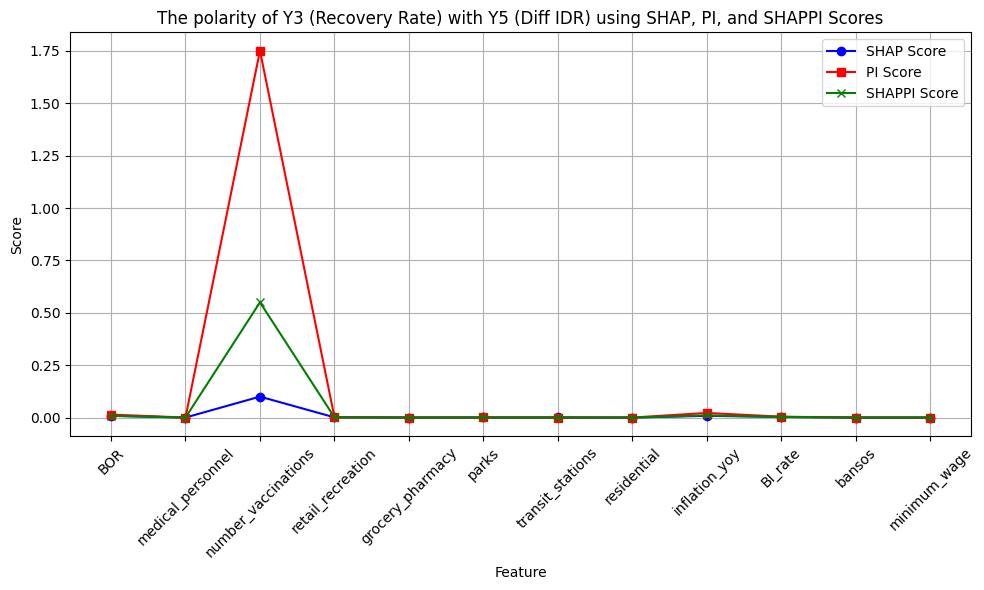

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y5, "The polarity of Y3 (Recovery Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


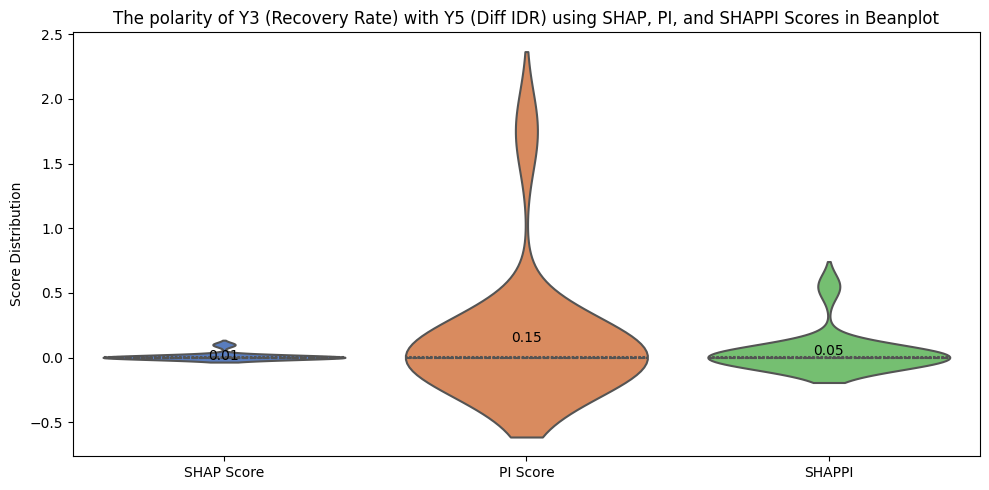

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y5, "The polarity of Y3 (Recovery Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y6:")
pol_anal_Y3_Y6, perm_imp_Y3_Y6 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y6, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y6:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y6:")
shappi_Y3_Y6 = analysis_SHAPPI(pol_anal_Y3_Y6, perm_imp_Y3_Y6)
shappi_Y3_Y6

Analysis SHAPPI Y3 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023703e-03  0.010401
0                   BOR  Positive  6.781671e-04  0.008219
9               BI_rate  Positive  1.769553e-04  0.002700
3     retail_recreation  Positive  2.419525e-04  0.001009
5                 parks  Positive  1.178646e-05  0.000247
6      transit_stations  Positive  1.360259e-05  0.000225
4      grocery_pharmacy  Positive  9.184399e-06  0.000135
7           residential  Positive  5.190901e-06  0.000072
1     medical_personnel  Positive  9.845361e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y6

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408669e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.261531e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857285e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053416e-04   
5                 parks      0.000247    0.000352  Positive  2.493000e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587329e-04   
7           residential     -0.000118    0.000117  Positive  4.576193e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099907e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781671e-04  0.008219  
1   9.845361e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419525e-04  0.001009  
4   9.184399e-06  0.000135  
5   1.178646e-05  0.000247  
6   1.360259e-05  0.000225  
7   5.190901e-06  0.000072  
8   1.023703e-03  0.010401  
9   1.769553e-04  0.002700  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

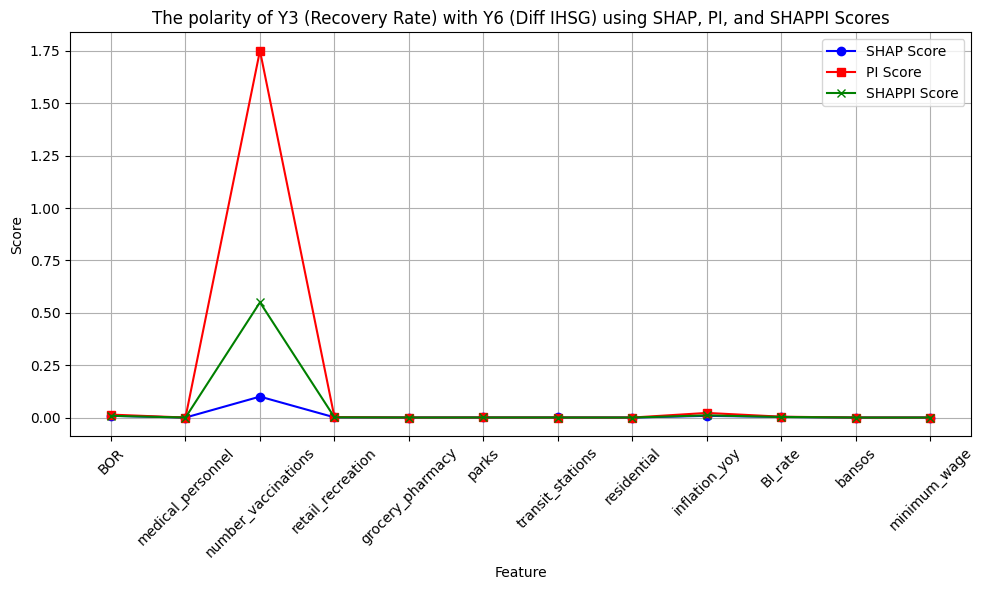

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y6, "The polarity of Y3 (Recovery Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


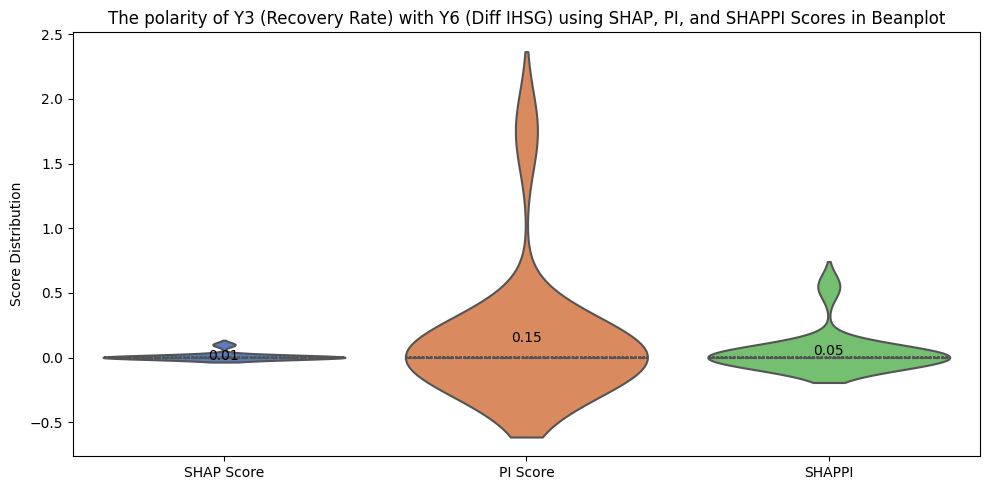

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y6, "The polarity of Y3 (Recovery Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y1:")
pol_anal_Y4_Y1, perm_imp_Y4_Y1 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y1, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y1:")
shappi_Y4_Y1 = analysis_SHAPPI(pol_anal_Y4_Y1, perm_imp_Y4_Y1)
shappi_Y4_Y1

Analysis SHAPPI Y4 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029934  0.550000
5                 parks  Positive  0.008346  0.182254
8         inflation_yoy  Positive  0.007588  0.163025
7           residential  Positive  0.010084  0.147662
4      grocery_pharmacy  Positive  0.012005  0.115872
2   number_vaccinations  Positive  0.008142  0.106762
3     retail_recreation  Positive  0.001041  0.013252
9               BI_rate  Positive  0.000767  0.007560
0                   BOR  Positive  0.000736  0.002166
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033410    0.021569  Positive  0.136832   
3     retail_recreation     -0.004074    0.004713  Positive  0.015534   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.152329   
5                 parks      0.080240    0.056460  Positive  0.219586   
6      transit_stations      0.099428    0.100000  Positive  0.712833   
7           residential     -0.005880    0.040577  Positive  0.181593   
8         inflation_yoy     -0.043185    0.051364  Positive  0.195806   
9               BI_rate     -0.000054    0.004370  Positive  0.007663   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002166  
1   0.000011  0.000095  
2   0.008142  0.106762  
3   0.001041  0.013252  
4   0.012005  0.115872  
5   0.008346  0.182254  
6   0.029934  0.550000  
7   0.010084  0.147662  
8   0.007588  0.163025  
9   0.000767  0.007560  
10  0.000000  0.000000  
11  0.000000  0.000000

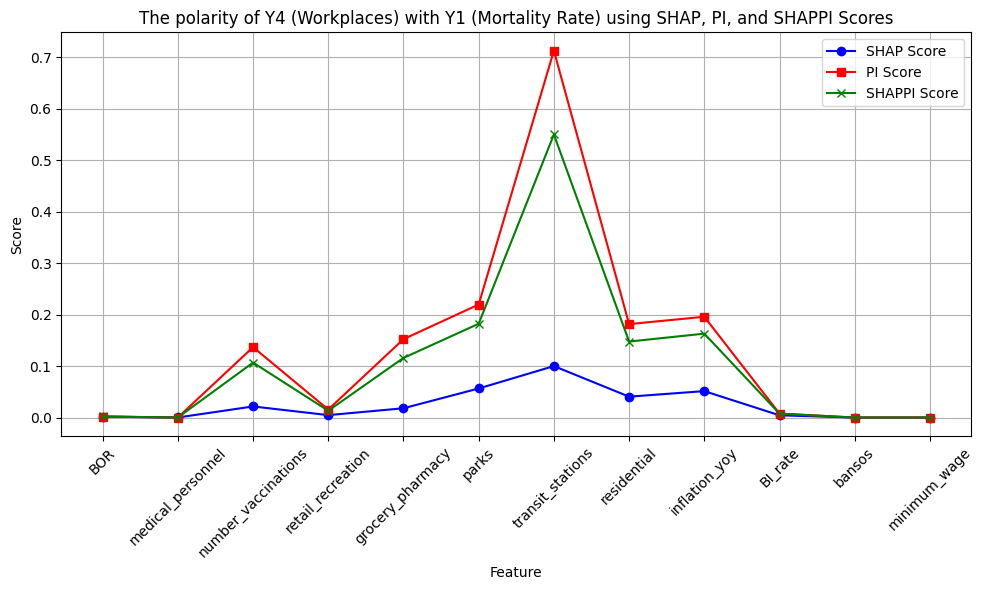

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y1, "The polarity of Y4 (Workplaces) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


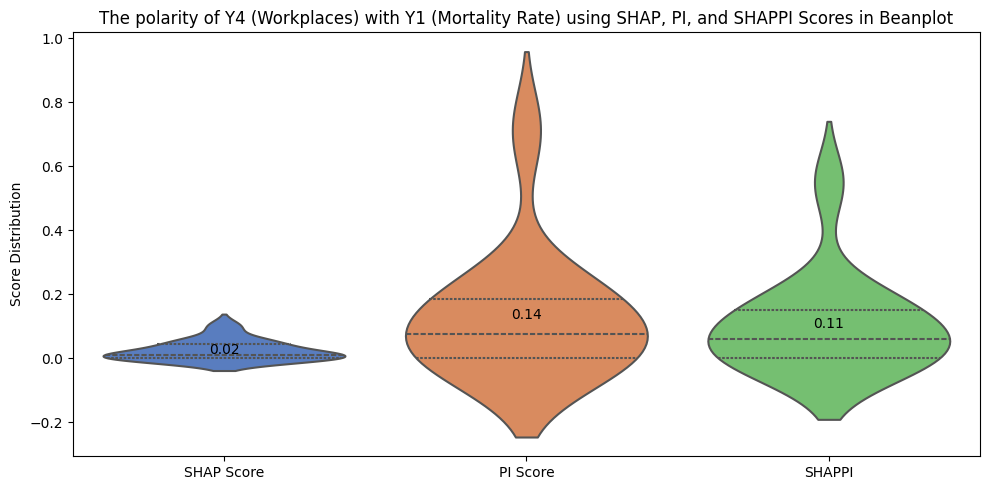

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y1, "The polarity of Y4 (Workplaces) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y2:")
pol_anal_Y4_Y2, perm_imp_Y4_Y2 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y2, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y2:")
shappi_Y4_Y2 = analysis_SHAPPI(pol_anal_Y4_Y2, perm_imp_Y4_Y2)
shappi_Y4_Y2

Analysis SHAPPI Y4 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029934  0.550000
5                 parks  Positive  0.008346  0.182254
8         inflation_yoy  Positive  0.007588  0.163025
7           residential  Positive  0.010084  0.147662
4      grocery_pharmacy  Positive  0.012005  0.115872
2   number_vaccinations  Positive  0.008142  0.106762
3     retail_recreation  Positive  0.001041  0.013252
9               BI_rate  Positive  0.000767  0.007560
0                   BOR  Positive  0.000736  0.002166
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033410    0.021569  Positive  0.136832   
3     retail_recreation     -0.004074    0.004713  Positive  0.015534   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.152329   
5                 parks      0.080240    0.056460  Positive  0.219586   
6      transit_stations      0.099428    0.100000  Positive  0.712833   
7           residential     -0.005880    0.040577  Positive  0.181593   
8         inflation_yoy     -0.043185    0.051364  Positive  0.195806   
9               BI_rate     -0.000054    0.004370  Positive  0.007663   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002166  
1   0.000011  0.000095  
2   0.008142  0.106762  
3   0.001041  0.013252  
4   0.012005  0.115872  
5   0.008346  0.182254  
6   0.029934  0.550000  
7   0.010084  0.147662  
8   0.007588  0.163025  
9   0.000767  0.007560  
10  0.000000  0.000000  
11  0.000000  0.000000

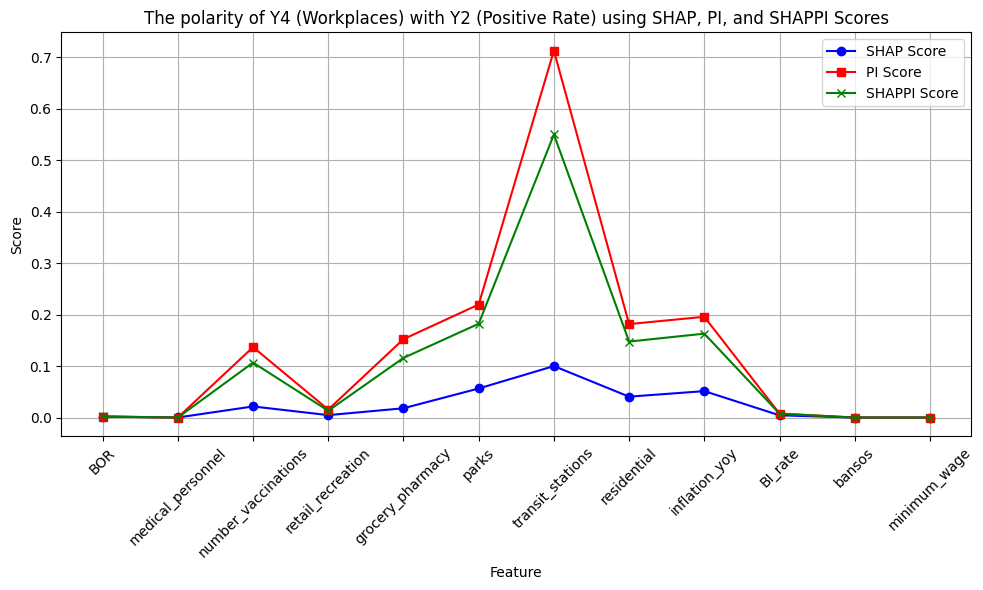

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y2, "The polarity of Y4 (Workplaces) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


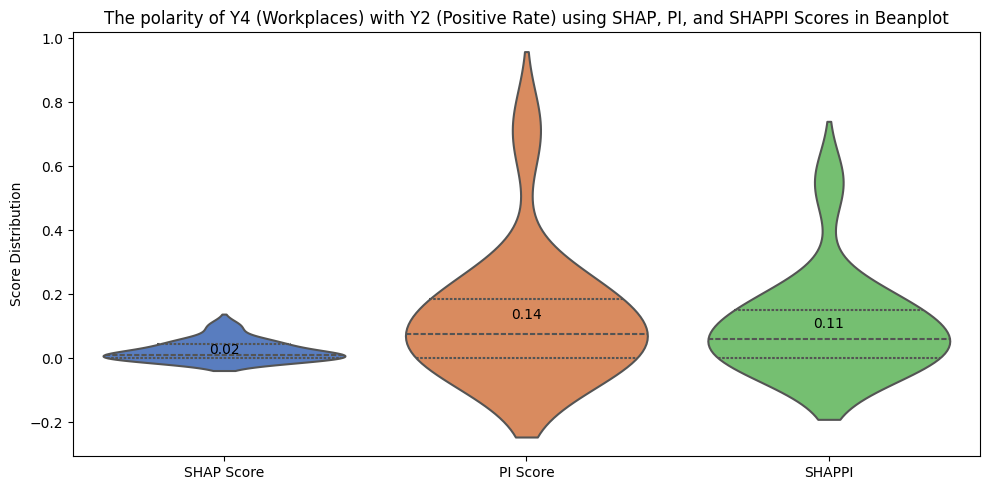

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y2, "The polarity of Y4 (Workplaces) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y3:")
pol_anal_Y4_Y3, perm_imp_Y4_Y3 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y3, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y3:")
shappi_Y4_Y3 = analysis_SHAPPI(pol_anal_Y4_Y3, perm_imp_Y4_Y3)
shappi_Y4_Y3

Analysis SHAPPI Y4 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029934  0.550000
5                 parks  Positive  0.008346  0.182254
8         inflation_yoy  Positive  0.007588  0.163025
7           residential  Positive  0.010084  0.147662
4      grocery_pharmacy  Positive  0.012005  0.115872
2   number_vaccinations  Positive  0.008142  0.106762
3     retail_recreation  Positive  0.001041  0.013252
9               BI_rate  Positive  0.000767  0.007560
0                   BOR  Positive  0.000736  0.002166
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033410    0.021569  Positive  0.136832   
3     retail_recreation     -0.004074    0.004713  Positive  0.015534   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.152329   
5                 parks      0.080240    0.056460  Positive  0.219586   
6      transit_stations      0.099428    0.100000  Positive  0.712833   
7           residential     -0.005880    0.040577  Positive  0.181593   
8         inflation_yoy     -0.043185    0.051364  Positive  0.195806   
9               BI_rate     -0.000054    0.004370  Positive  0.007663   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002166  
1   0.000011  0.000095  
2   0.008142  0.106762  
3   0.001041  0.013252  
4   0.012005  0.115872  
5   0.008346  0.182254  
6   0.029934  0.550000  
7   0.010084  0.147662  
8   0.007588  0.163025  
9   0.000767  0.007560  
10  0.000000  0.000000  
11  0.000000  0.000000

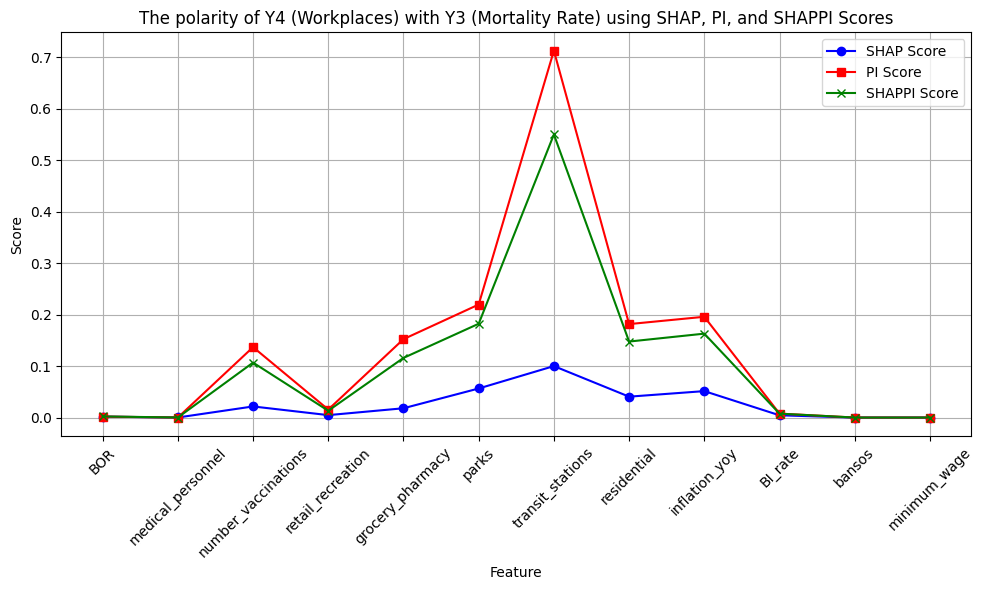

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y3, "The polarity of Y4 (Workplaces) with Y3 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


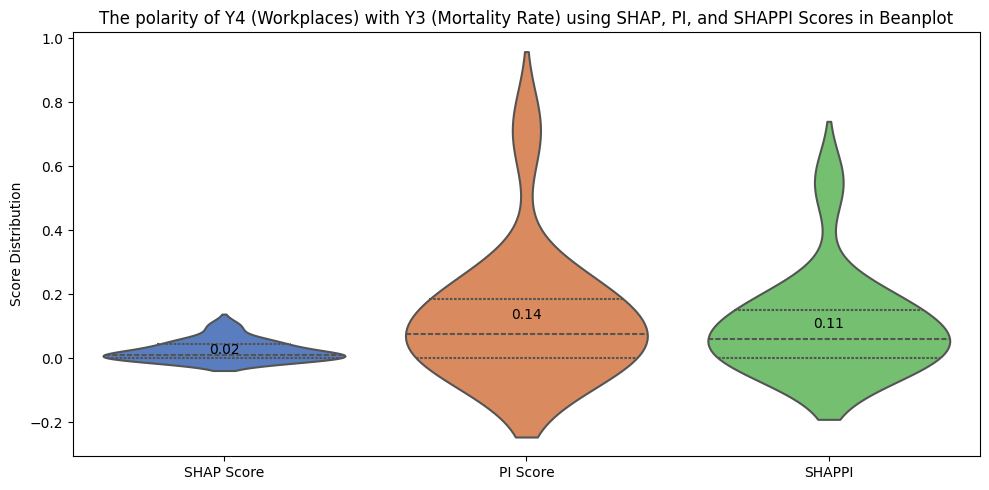

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y3, "The polarity of Y4 (Workplaces) with Y3 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y5:")
pol_anal_Y4_Y5, perm_imp_Y4_Y5 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y5, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y5:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y5:")
shappi_Y4_Y5 = analysis_SHAPPI(pol_anal_Y4_Y5, perm_imp_Y4_Y5)
shappi_Y4_Y5

Analysis SHAPPI Y4 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029934  0.550000
5                 parks  Positive  0.008346  0.182254
8         inflation_yoy  Positive  0.007588  0.163025
7           residential  Positive  0.010084  0.147662
4      grocery_pharmacy  Positive  0.012005  0.115872
2   number_vaccinations  Positive  0.008142  0.106762
3     retail_recreation  Positive  0.001041  0.013252
9               BI_rate  Positive  0.000767  0.007560
0                   BOR  Positive  0.000736  0.002166
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033410    0.021569  Positive  0.136832   
3     retail_recreation     -0.004074    0.004713  Positive  0.015534   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.152329   
5                 parks      0.080240    0.056460  Positive  0.219586   
6      transit_stations      0.099428    0.100000  Positive  0.712833   
7           residential     -0.005880    0.040577  Positive  0.181593   
8         inflation_yoy     -0.043185    0.051364  Positive  0.195806   
9               BI_rate     -0.000054    0.004370  Positive  0.007663   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002166  
1   0.000011  0.000095  
2   0.008142  0.106762  
3   0.001041  0.013252  
4   0.012005  0.115872  
5   0.008346  0.182254  
6   0.029934  0.550000  
7   0.010084  0.147662  
8   0.007588  0.163025  
9   0.000767  0.007560  
10  0.000000  0.000000  
11  0.000000  0.000000

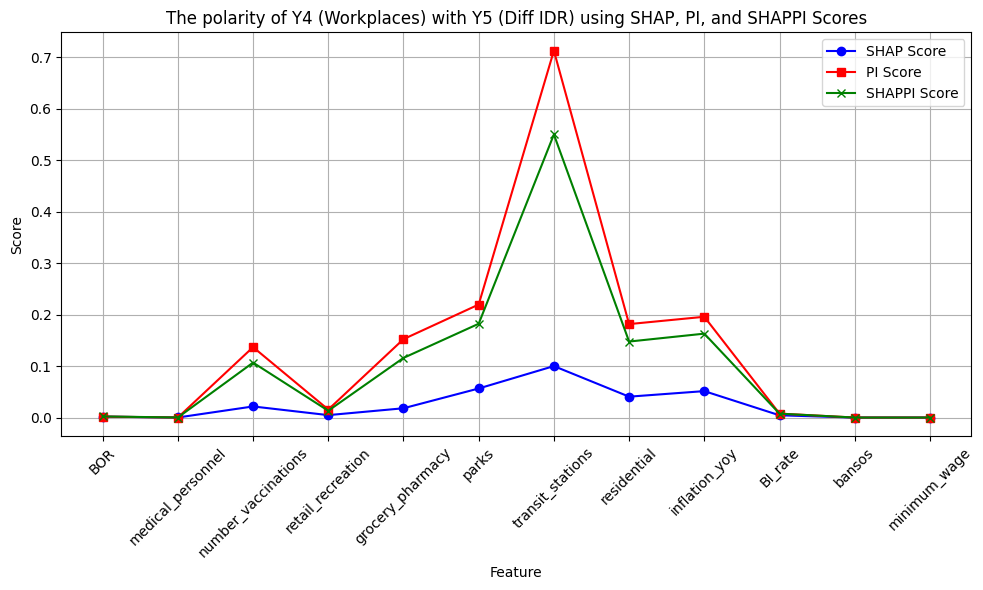

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y5, "The polarity of Y4 (Workplaces) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


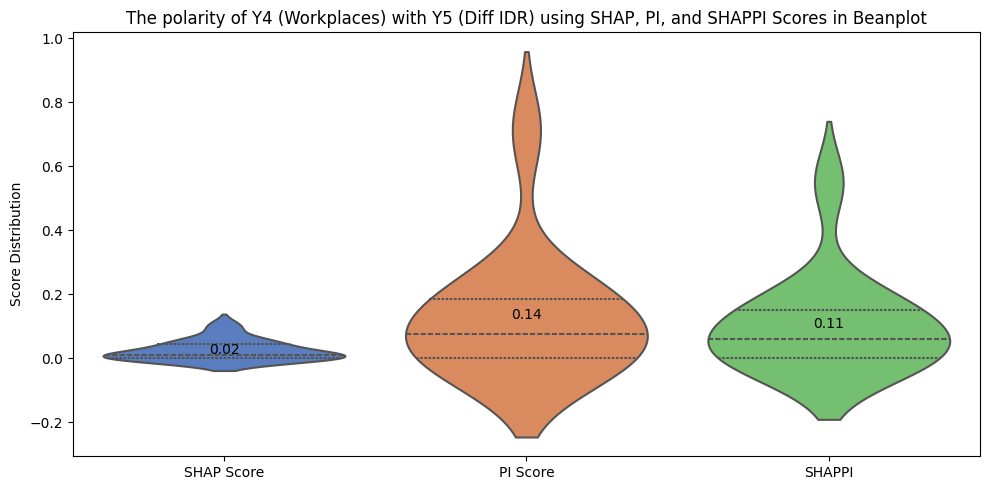

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y5, "The polarity of Y4 (Workplaces) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y6:")
pol_anal_Y4_Y6, perm_imp_Y4_Y6 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y6, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y6:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y6:")
shappi_Y4_Y6 = analysis_SHAPPI(pol_anal_Y4_Y6, perm_imp_Y4_Y6)
shappi_Y4_Y6

Analysis SHAPPI Y4 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029934  0.550000
5                 parks  Positive  0.008346  0.182254
8         inflation_yoy  Positive  0.007588  0.163025
7           residential  Positive  0.010084  0.147662
4      grocery_pharmacy  Positive  0.012005  0.115872
2   number_vaccinations  Positive  0.008142  0.106762
3     retail_recreation  Positive  0.001041  0.013252
9               BI_rate  Positive  0.000767  0.007560
0                   BOR  Positive  0.000736  0.002166
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033410    0.021569  Positive  0.136832   
3     retail_recreation     -0.004074    0.004713  Positive  0.015534   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.152329   
5                 parks      0.080240    0.056460  Positive  0.219586   
6      transit_stations      0.099428    0.100000  Positive  0.712833   
7           residential     -0.005880    0.040577  Positive  0.181593   
8         inflation_yoy     -0.043185    0.051364  Positive  0.195806   
9               BI_rate     -0.000054    0.004370  Positive  0.007663   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002166  
1   0.000011  0.000095  
2   0.008142  0.106762  
3   0.001041  0.013252  
4   0.012005  0.115872  
5   0.008346  0.182254  
6   0.029934  0.550000  
7   0.010084  0.147662  
8   0.007588  0.163025  
9   0.000767  0.007560  
10  0.000000  0.000000  
11  0.000000  0.000000

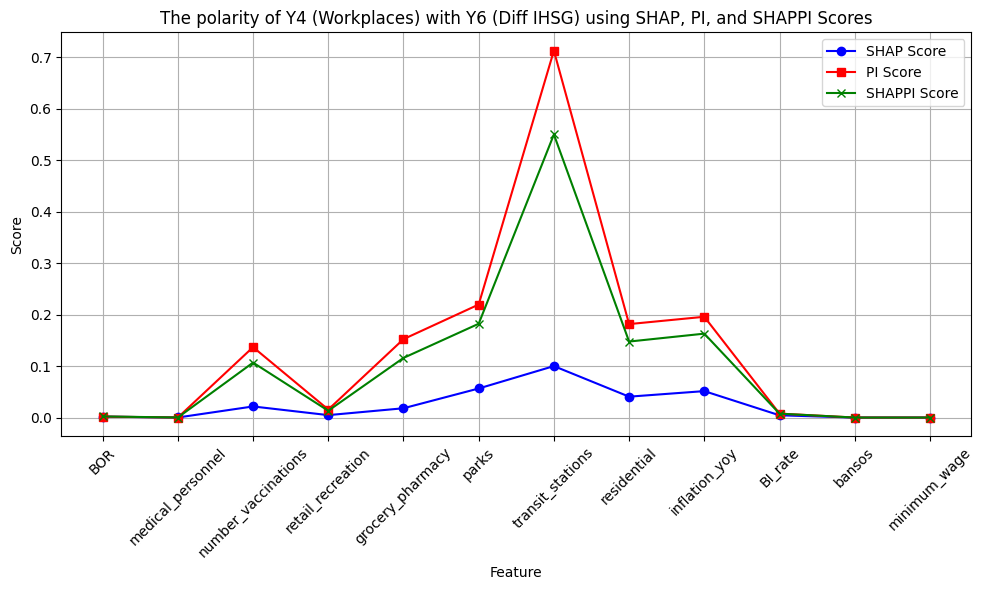

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y6, "The polarity of Y4 (Workplaces) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


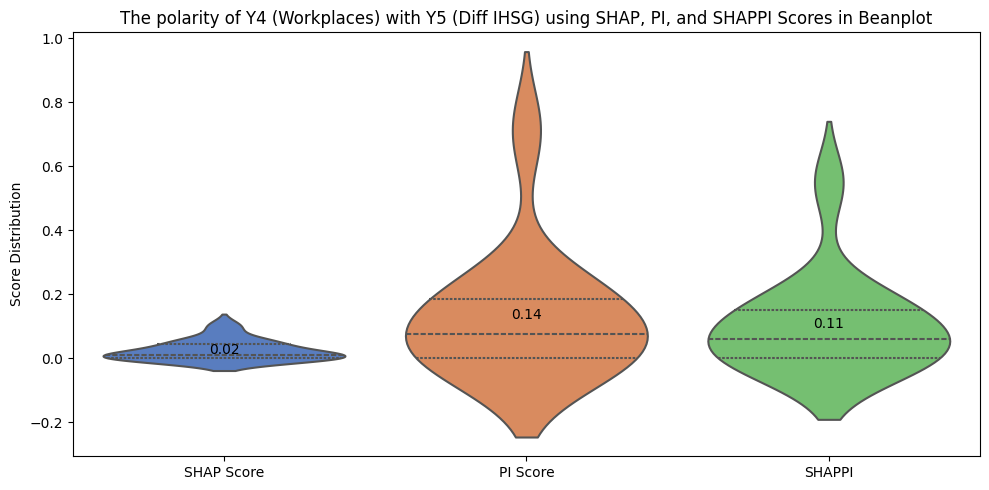

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y6, "The polarity of Y4 (Workplaces) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y1:")
pol_anal_Y5_Y1, perm_imp_Y5_Y1 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y1, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y1:")
shappi_Y5_Y1 = analysis_SHAPPI(pol_anal_Y5_Y1, perm_imp_Y5_Y1)
shappi_Y5_Y1

Analysis SHAPPI Y5 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027547  0.510785
3     retail_recreation  Positive  0.032901  0.269342
5                 parks  Positive  0.023874  0.236164
8         inflation_yoy  Positive  0.029988  0.204427
4      grocery_pharmacy  Positive  0.013565  0.179214
6      transit_stations  Positive  0.013628  0.154418
7           residential  Positive  0.008422  0.113781
9               BI_rate  Positive  0.011608  0.101941
0                   BOR  Positive  0.006511  0.015500
1     medical_personnel  Positive  0.000004  0.000060
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.023870   
1     medical_personnel      0.000296    0.000115  Positive  0.000003   
2   number_vaccinations     -0.033410    0.021569  Positive  0.815443   
3     retail_recreation     -0.004074    0.004713  Positive  0.435422   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.277560   
5                 parks      0.080240    0.056460  Positive  0.339117   
6      transit_stations      0.099428    0.100000  Positive  0.170293   
7           residential     -0.005880    0.040577  Positive  0.152476   
8         inflation_yoy     -0.043185    0.051364  Positive  0.291514   
9               BI_rate     -0.000054    0.004370  Positive  0.162691   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006511  0.015500  
1   0.000004  0.000060  
2   0.027547  0.510785  
3   0.032901  0.269342  
4   0.013565  0.179214  
5   0.023874  0.236164  
6   0.013628  0.154418  
7   0.008422  0.113781  
8   0.029988  0.204427  
9   0.011608  0.101941  
10  0.000000  0.000000  
11  0.000000  0.000000

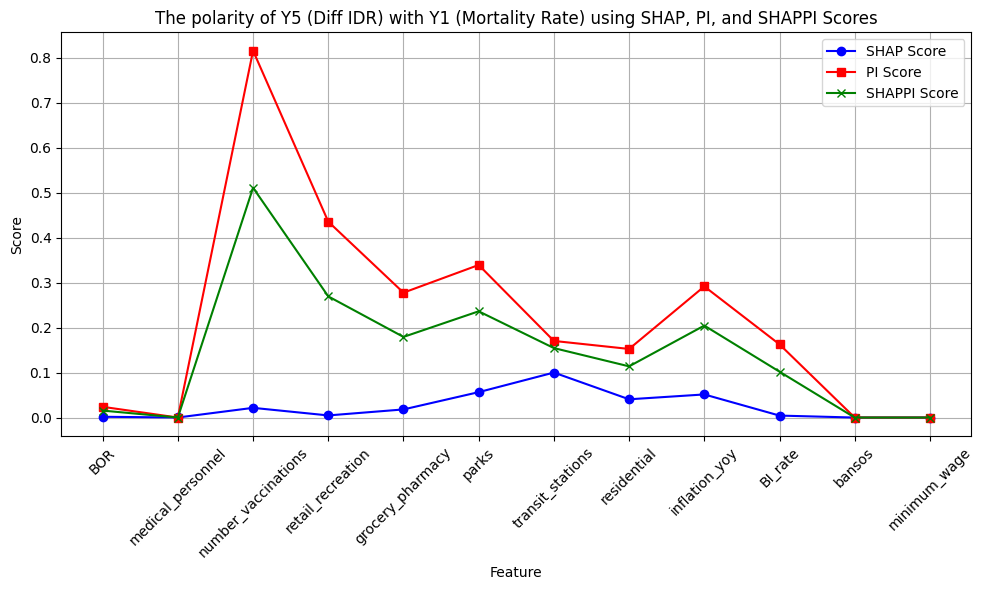

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y1, "The polarity of Y5 (Diff IDR) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


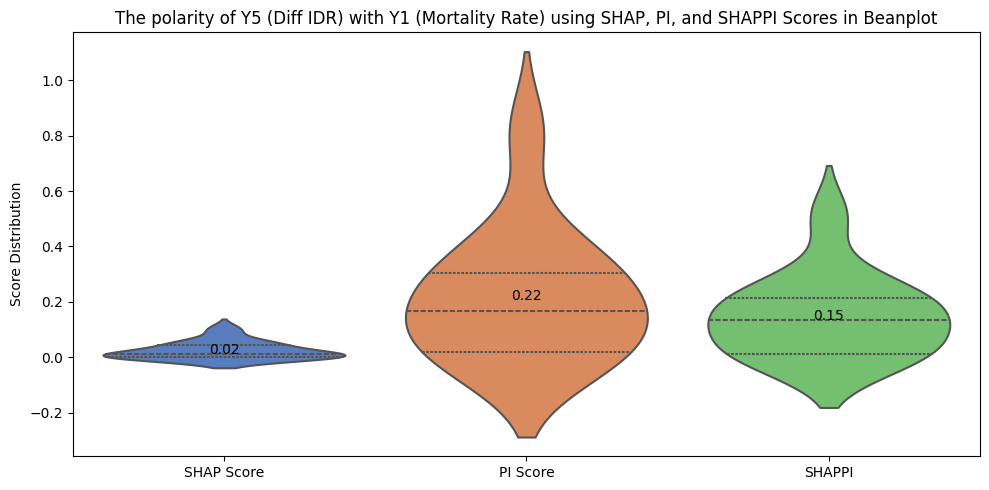

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y1, "The polarity of Y5 (Diff IDR) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y2:")
pol_anal_Y5_Y2, perm_imp_Y5_Y2 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y2, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y2:")
shappi_Y5_Y2 = analysis_SHAPPI(pol_anal_Y5_Y2, perm_imp_Y5_Y2)
shappi_Y5_Y2

Analysis SHAPPI Y5 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027547  0.510785
3     retail_recreation  Positive  0.032901  0.269342
5                 parks  Positive  0.023874  0.236164
8         inflation_yoy  Positive  0.029988  0.204427
4      grocery_pharmacy  Positive  0.013565  0.179214
6      transit_stations  Positive  0.013628  0.154418
7           residential  Positive  0.008422  0.113781
9               BI_rate  Positive  0.011608  0.101941
0                   BOR  Positive  0.006511  0.015500
1     medical_personnel  Positive  0.000004  0.000060
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.023870   
1     medical_personnel      0.000296    0.000115  Positive  0.000003   
2   number_vaccinations     -0.033410    0.021569  Positive  0.815443   
3     retail_recreation     -0.004074    0.004713  Positive  0.435422   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.277560   
5                 parks      0.080240    0.056460  Positive  0.339117   
6      transit_stations      0.099428    0.100000  Positive  0.170293   
7           residential     -0.005880    0.040577  Positive  0.152476   
8         inflation_yoy     -0.043185    0.051364  Positive  0.291514   
9               BI_rate     -0.000054    0.004370  Positive  0.162691   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006511  0.015500  
1   0.000004  0.000060  
2   0.027547  0.510785  
3   0.032901  0.269342  
4   0.013565  0.179214  
5   0.023874  0.236164  
6   0.013628  0.154418  
7   0.008422  0.113781  
8   0.029988  0.204427  
9   0.011608  0.101941  
10  0.000000  0.000000  
11  0.000000  0.000000

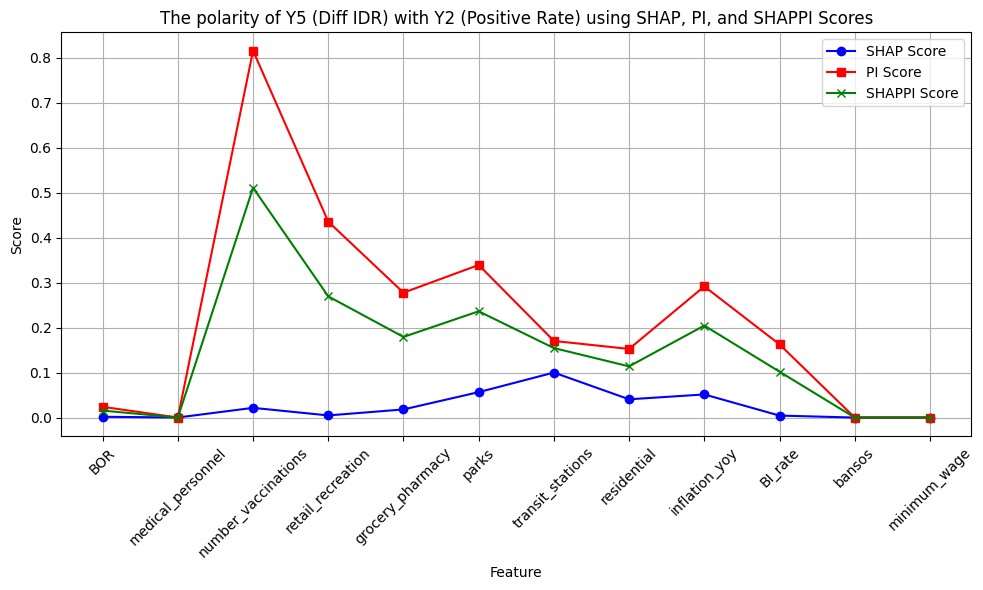

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y2, "The polarity of Y5 (Diff IDR) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


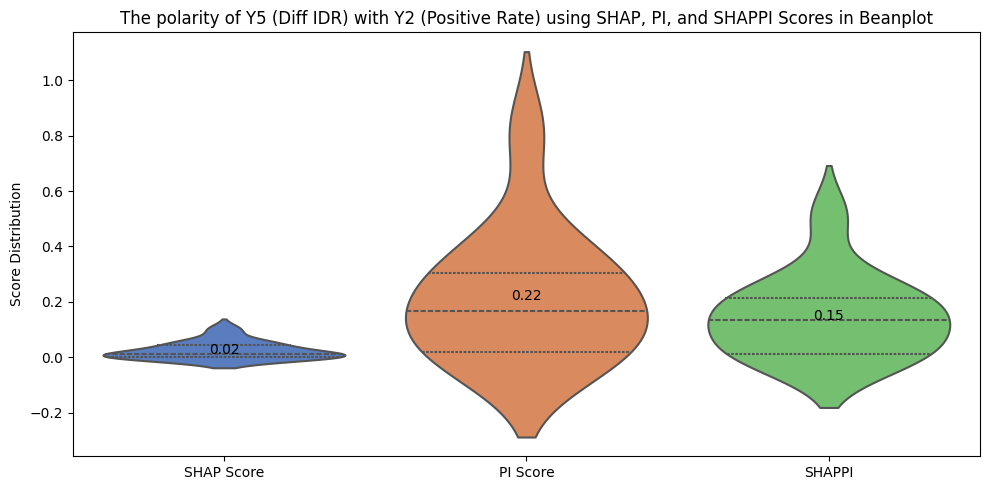

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y2, "The polarity of Y5 (Diff IDR) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y3:")
pol_anal_Y5_Y3, perm_imp_Y5_Y3 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y3, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y3:")
shappi_Y5_Y3 = analysis_SHAPPI(pol_anal_Y5_Y3, perm_imp_Y5_Y3)
shappi_Y5_Y3

Analysis SHAPPI Y5 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027547  0.510785
3     retail_recreation  Positive  0.032901  0.269342
5                 parks  Positive  0.023874  0.236164
8         inflation_yoy  Positive  0.029988  0.204427
4      grocery_pharmacy  Positive  0.013565  0.179214
6      transit_stations  Positive  0.013628  0.154418
7           residential  Positive  0.008422  0.113781
9               BI_rate  Positive  0.011608  0.101941
0                   BOR  Positive  0.006511  0.015500
1     medical_personnel  Positive  0.000004  0.000060
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.023870   
1     medical_personnel      0.000296    0.000115  Positive  0.000003   
2   number_vaccinations     -0.033410    0.021569  Positive  0.815443   
3     retail_recreation     -0.004074    0.004713  Positive  0.435422   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.277560   
5                 parks      0.080240    0.056460  Positive  0.339117   
6      transit_stations      0.099428    0.100000  Positive  0.170293   
7           residential     -0.005880    0.040577  Positive  0.152476   
8         inflation_yoy     -0.043185    0.051364  Positive  0.291514   
9               BI_rate     -0.000054    0.004370  Positive  0.162691   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006511  0.015500  
1   0.000004  0.000060  
2   0.027547  0.510785  
3   0.032901  0.269342  
4   0.013565  0.179214  
5   0.023874  0.236164  
6   0.013628  0.154418  
7   0.008422  0.113781  
8   0.029988  0.204427  
9   0.011608  0.101941  
10  0.000000  0.000000  
11  0.000000  0.000000

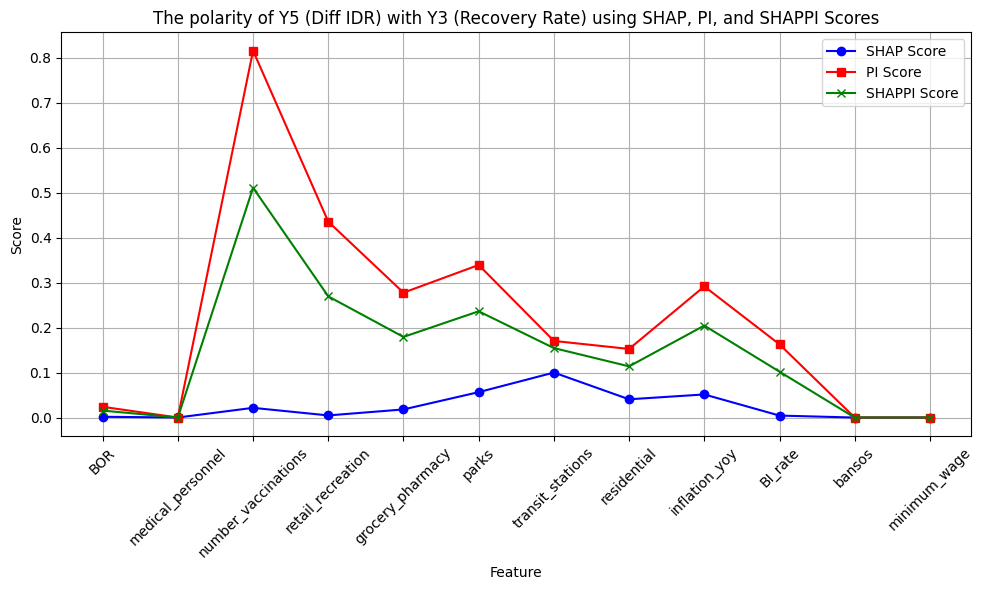

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y3, "The polarity of Y5 (Diff IDR) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


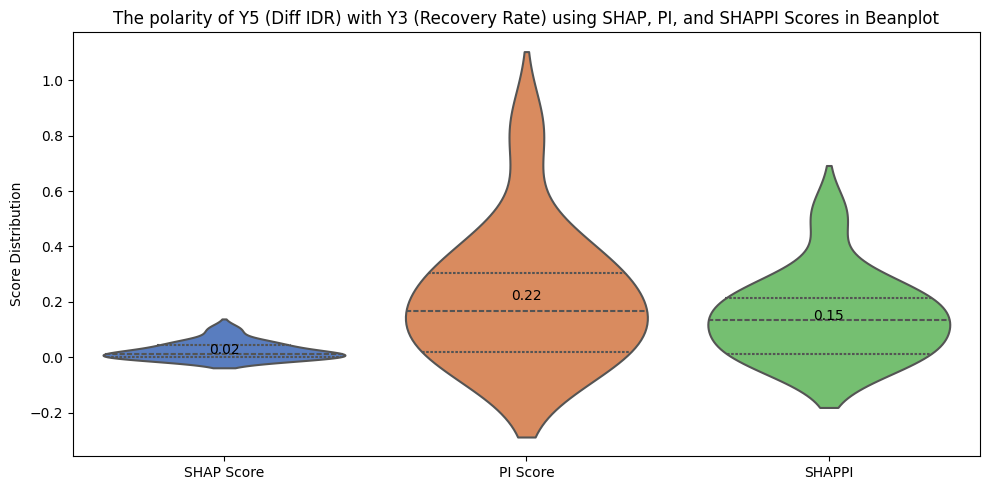

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y3, "The polarity of Y5 (Diff IDR) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y4:")
pol_anal_Y5_Y4, perm_imp_Y5_Y4 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y4, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y4:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y4:")
shappi_Y5_Y4 = analysis_SHAPPI(pol_anal_Y5_Y4, perm_imp_Y5_Y4)
shappi_Y5_Y4

Analysis SHAPPI Y5 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027547  0.510785
3     retail_recreation  Positive  0.032901  0.269342
5                 parks  Positive  0.023874  0.236164
8         inflation_yoy  Positive  0.029988  0.204427
4      grocery_pharmacy  Positive  0.013565  0.179214
6      transit_stations  Positive  0.013628  0.154418
7           residential  Positive  0.008422  0.113781
9               BI_rate  Positive  0.011608  0.101941
0                   BOR  Positive  0.006511  0.015500
1     medical_personnel  Positive  0.000004  0.000060
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.023870   
1     medical_personnel      0.000296    0.000115  Positive  0.000003   
2   number_vaccinations     -0.033410    0.021569  Positive  0.815443   
3     retail_recreation     -0.004074    0.004713  Positive  0.435422   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.277560   
5                 parks      0.080240    0.056460  Positive  0.339117   
6      transit_stations      0.099428    0.100000  Positive  0.170293   
7           residential     -0.005880    0.040577  Positive  0.152476   
8         inflation_yoy     -0.043185    0.051364  Positive  0.291514   
9               BI_rate     -0.000054    0.004370  Positive  0.162691   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006511  0.015500  
1   0.000004  0.000060  
2   0.027547  0.510785  
3   0.032901  0.269342  
4   0.013565  0.179214  
5   0.023874  0.236164  
6   0.013628  0.154418  
7   0.008422  0.113781  
8   0.029988  0.204427  
9   0.011608  0.101941  
10  0.000000  0.000000  
11  0.000000  0.000000

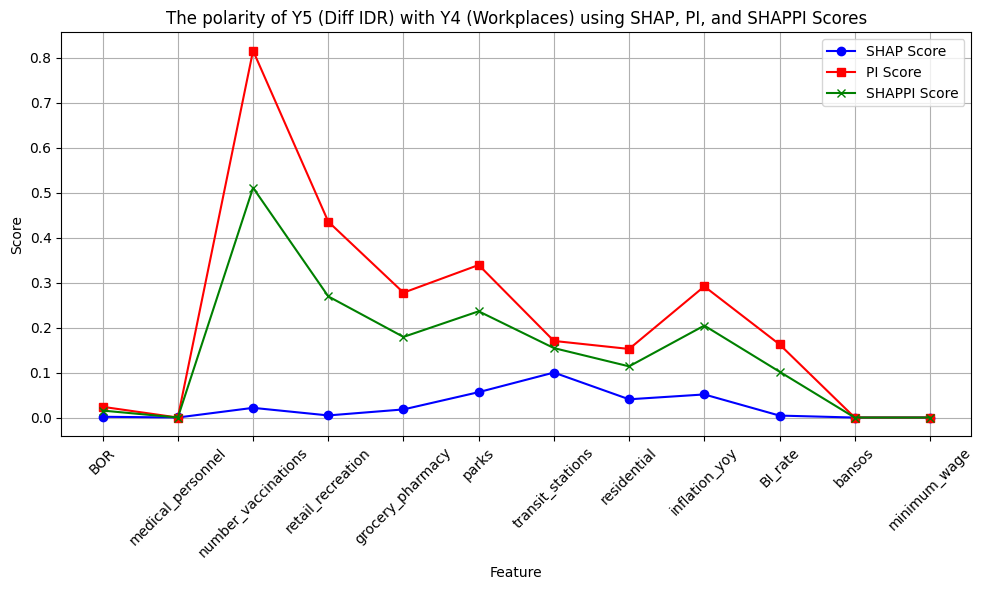

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y4, "The polarity of Y5 (Diff IDR) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


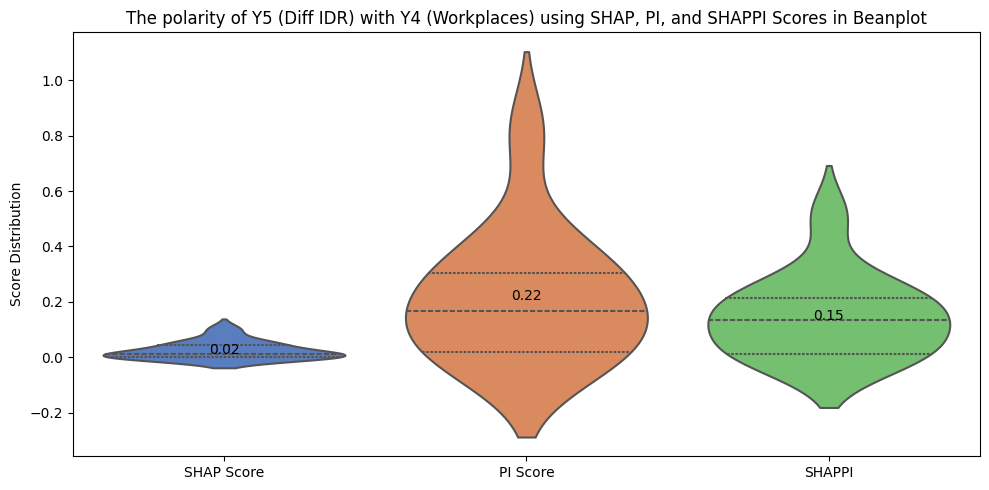

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y4, "The polarity of Y5 (Diff IDR) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y6:")
pol_anal_Y5_Y6, perm_imp_Y5_Y6 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y6, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y6:
---------------------------------------------------------------
Mean =  [0.00689255 0.00045943 0.08611675 0.01881885 0.07205579 0.2254225
 0.3992579  0.16200778 0.20507294 0.01744741 0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y6:")
shappi_Y5_Y6 = analysis_SHAPPI(pol_anal_Y5_Y6, perm_imp_Y5_Y6)
shappi_Y5_Y6

Analysis SHAPPI Y5 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027547  0.510785
3     retail_recreation  Positive  0.032901  0.269342
5                 parks  Positive  0.023874  0.236164
8         inflation_yoy  Positive  0.029988  0.204427
4      grocery_pharmacy  Positive  0.013565  0.179214
6      transit_stations  Positive  0.013628  0.154418
7           residential  Positive  0.008422  0.113781
9               BI_rate  Positive  0.011608  0.101941
0                   BOR  Positive  0.006511  0.015500
1     medical_personnel  Positive  0.000004  0.000060
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002098    0.001726  Positive  0.023870   
1     medical_personnel      0.000296    0.000115  Positive  0.000003   
2   number_vaccinations     -0.033410    0.021569  Positive  0.815443   
3     retail_recreation     -0.004074    0.004713  Positive  0.435422   
4      grocery_pharmacy     -0.058608    0.018047  Positive  0.277560   
5                 parks      0.080240    0.056460  Positive  0.339117   
6      transit_stations      0.099428    0.100000  Positive  0.170293   
7           residential     -0.005880    0.040577  Positive  0.152476   
8         inflation_yoy     -0.043185    0.051364  Positive  0.291514   
9               BI_rate     -0.000054    0.004370  Positive  0.162691   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006511  0.015500  
1   0.000004  0.000060  
2   0.027547  0.510785  
3   0.032901  0.269342  
4   0.013565  0.179214  
5   0.023874  0.236164  
6   0.013628  0.154418  
7   0.008422  0.113781  
8   0.029988  0.204427  
9   0.011608  0.101941  
10  0.000000  0.000000  
11  0.000000  0.000000

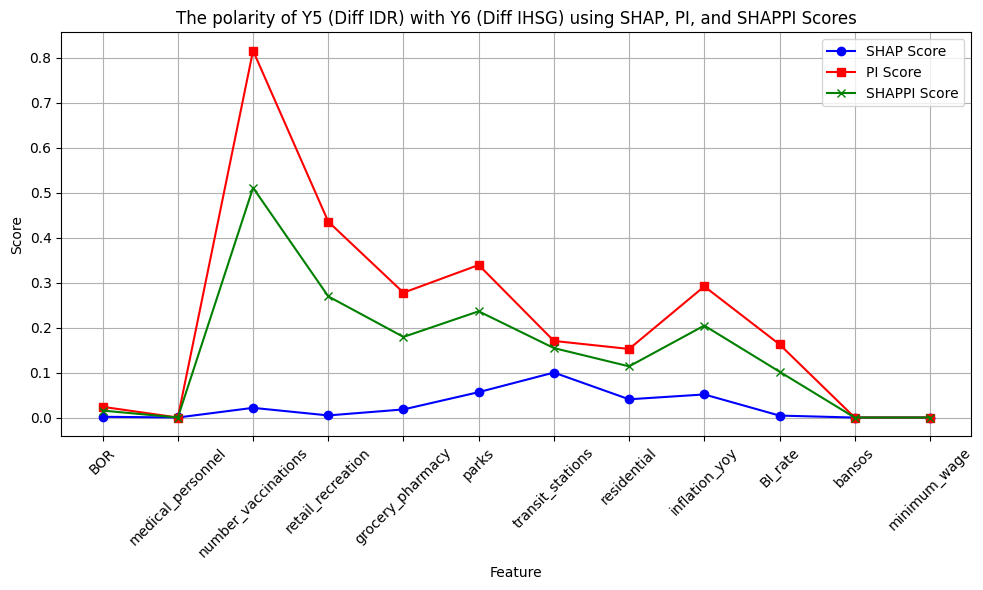

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y6, "The polarity of Y5 (Diff IDR) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


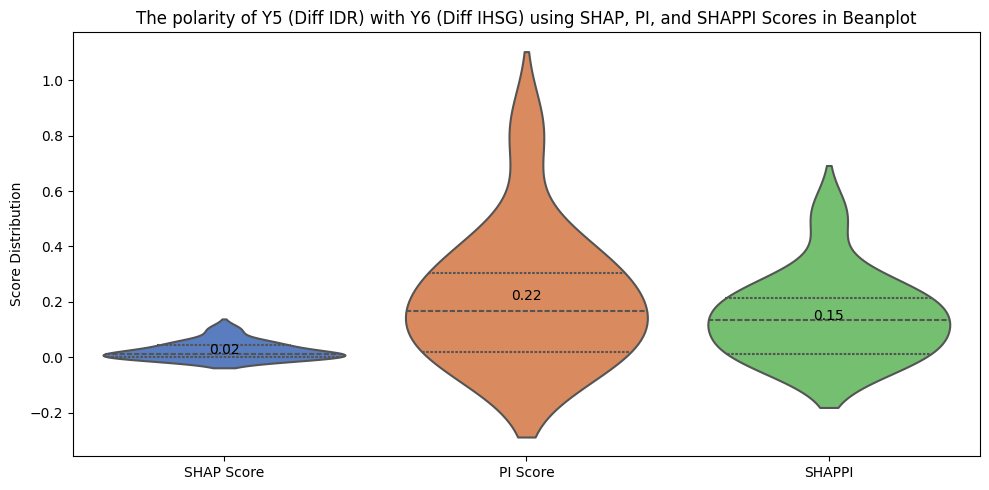

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y6, "The polarity of Y5 (Diff IDR) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y1:")
pol_anal_Y6_Y1, perm_imp_Y6_Y1 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y1, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.03034419 0.00642562 0.17568372 0.2422621  0.13964765 0.14838354
 0.08213429 0.04850331 0.17027108 0.07607185 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y1:")
shappi_Y6_Y1 = analysis_SHAPPI(pol_anal_Y6_Y1, perm_imp_Y6_Y1)
shappi_Y6_Y1

Analysis SHAPPI Y6 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.062345  0.550000
2   number_vaccinations  Positive  0.014412  0.298819
4      grocery_pharmacy  Positive  0.028377  0.296342
5                 parks  Positive  0.018235  0.241738
8         inflation_yoy  Positive  0.021030  0.209224
9               BI_rate  Positive  0.018371  0.119142
6      transit_stations  Positive  0.023541  0.095690
7           residential  Positive  0.003927  0.058636
0                   BOR  Positive  0.005812  0.020393
1     medical_personnel  Positive  0.000554  0.001852
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008554    0.012525  Positive  0.031388   
1     medical_personnel     -0.002633    0.002652  Positive  0.001169   
2   number_vaccinations     -0.009507    0.072518  Positive  0.583220   
3     retail_recreation     -0.031028    0.100000  Positive  1.110640   
4      grocery_pharmacy     -0.032389    0.057643  Positive  0.594238   
5                 parks      0.050571    0.061249  Positive  0.468943   
6      transit_stations     -0.004030    0.033903  Positive  0.174900   
7           residential      0.005105    0.020021  Positive  0.108011   
8         inflation_yoy      0.000087    0.070284  Positive  0.386685   
9               BI_rate      0.010011    0.031401  Positive  0.229774   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005812  0.020393  
1   0.000554  0.001852  
2   0.014412  0.298819  
3   0.062345  0.550000  
4   0.028377  0.296342  
5   0.018235  0.241738  
6   0.023541  0.095690  
7   0.003927  0.058636  
8   0.021030  0.209224  
9   0.018371  0.119142  
10  0.000000  0.000000  
11  0.000000  0.000000

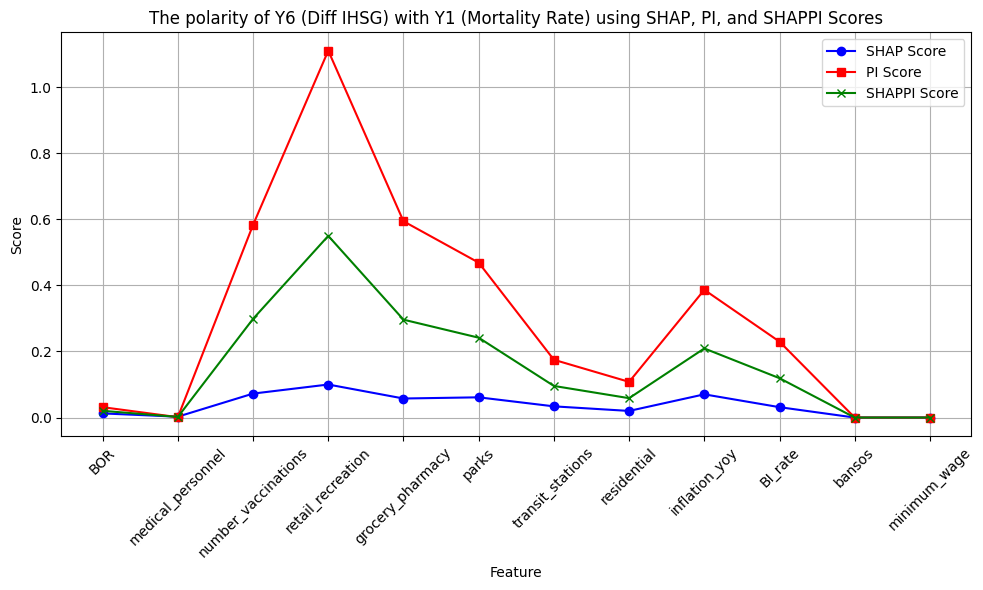

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y1, "The polarity of Y6 (Diff IHSG) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


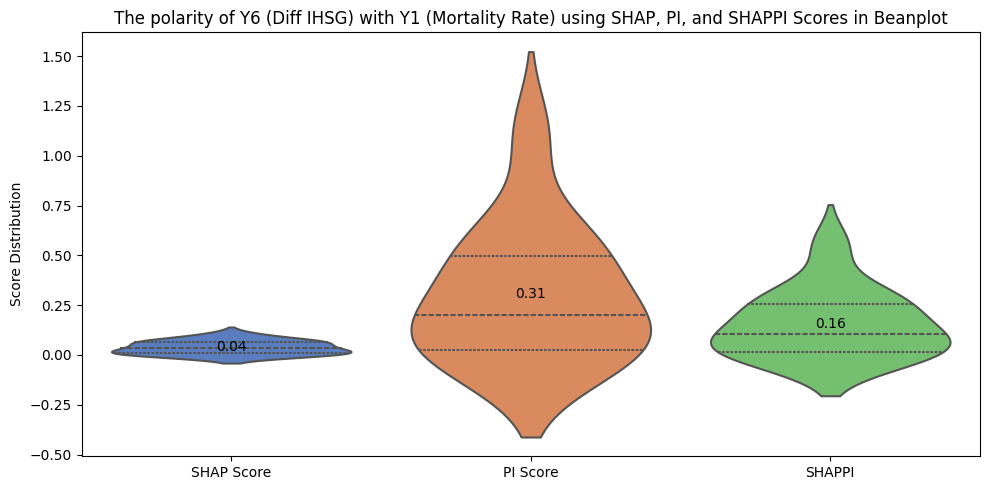

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y1, "The polarity of Y6 (Diff IHSG) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y2:")
pol_anal_Y6_Y2, perm_imp_Y6_Y2 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y2, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.03034419 0.00642562 0.17568372 0.2422621  0.13964765 0.14838354
 0.08213429 0.04850331 0.17027108 0.07607185 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y2:")
shappi_Y6_Y2 = analysis_SHAPPI(pol_anal_Y6_Y2, perm_imp_Y6_Y2)
shappi_Y6_Y2

Analysis SHAPPI Y6 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.062345  0.550000
2   number_vaccinations  Positive  0.014412  0.298819
4      grocery_pharmacy  Positive  0.028377  0.296342
5                 parks  Positive  0.018235  0.241738
8         inflation_yoy  Positive  0.021030  0.209224
9               BI_rate  Positive  0.018371  0.119142
6      transit_stations  Positive  0.023541  0.095690
7           residential  Positive  0.003927  0.058636
0                   BOR  Positive  0.005812  0.020393
1     medical_personnel  Positive  0.000554  0.001852
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008554    0.012525  Positive  0.031388   
1     medical_personnel     -0.002633    0.002652  Positive  0.001169   
2   number_vaccinations     -0.009507    0.072518  Positive  0.583220   
3     retail_recreation     -0.031028    0.100000  Positive  1.110640   
4      grocery_pharmacy     -0.032389    0.057643  Positive  0.594238   
5                 parks      0.050571    0.061249  Positive  0.468943   
6      transit_stations     -0.004030    0.033903  Positive  0.174900   
7           residential      0.005105    0.020021  Positive  0.108011   
8         inflation_yoy      0.000087    0.070284  Positive  0.386685   
9               BI_rate      0.010011    0.031401  Positive  0.229774   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005812  0.020393  
1   0.000554  0.001852  
2   0.014412  0.298819  
3   0.062345  0.550000  
4   0.028377  0.296342  
5   0.018235  0.241738  
6   0.023541  0.095690  
7   0.003927  0.058636  
8   0.021030  0.209224  
9   0.018371  0.119142  
10  0.000000  0.000000  
11  0.000000  0.000000

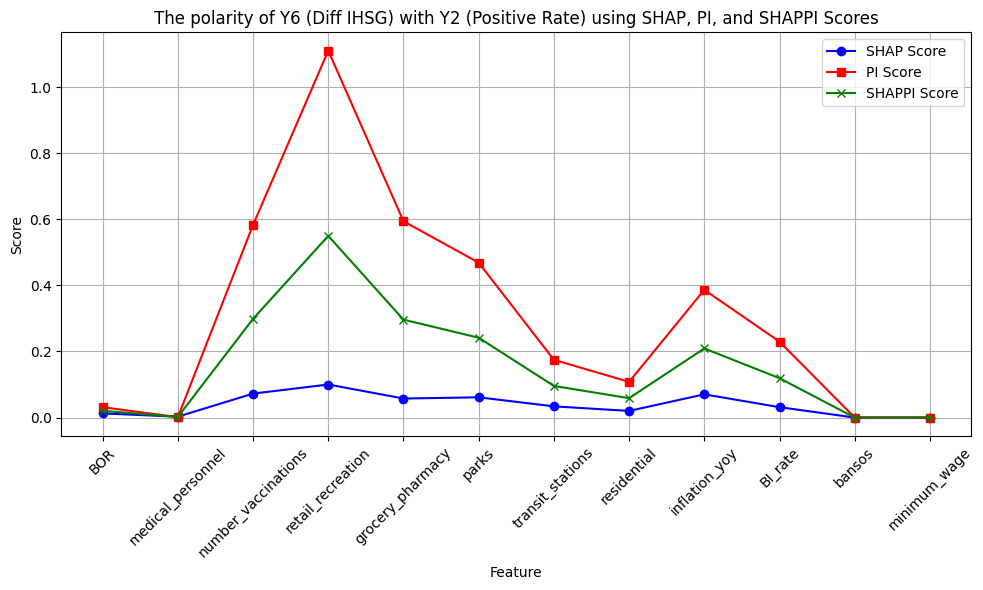

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y2, "The polarity of Y6 (Diff IHSG) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


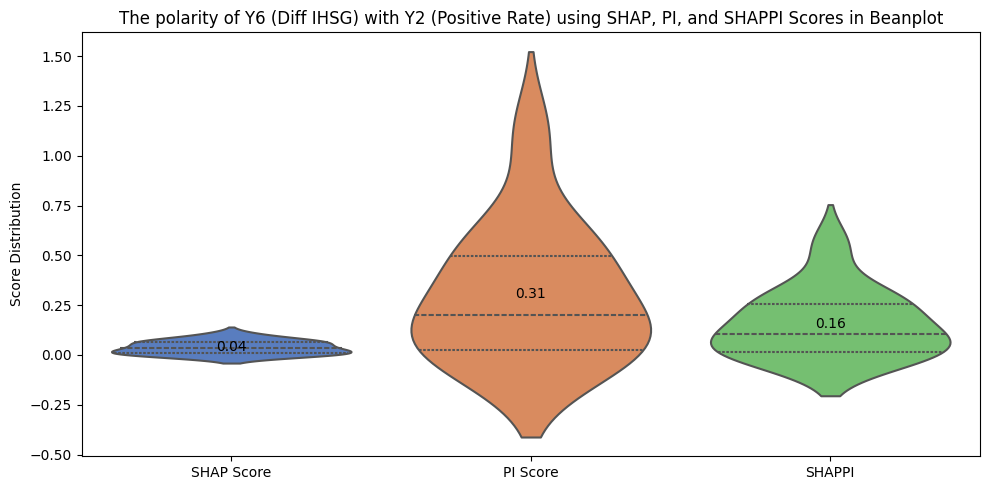

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y2, "The polarity of Y6 (Diff IHSG) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y3:")
pol_anal_Y6_Y3, perm_imp_Y6_Y3 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y3, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.03034419 0.00642562 0.17568372 0.2422621  0.13964765 0.14838354
 0.08213429 0.04850331 0.17027108 0.07607185 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y3:")
shappi_Y6_Y3 = analysis_SHAPPI(pol_anal_Y6_Y3, perm_imp_Y6_Y3)
shappi_Y6_Y3

Analysis SHAPPI Y6 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.062345  0.550000
2   number_vaccinations  Positive  0.014412  0.298819
4      grocery_pharmacy  Positive  0.028377  0.296342
5                 parks  Positive  0.018235  0.241738
8         inflation_yoy  Positive  0.021030  0.209224
9               BI_rate  Positive  0.018371  0.119142
6      transit_stations  Positive  0.023541  0.095690
7           residential  Positive  0.003927  0.058636
0                   BOR  Positive  0.005812  0.020393
1     medical_personnel  Positive  0.000554  0.001852
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008554    0.012525  Positive  0.031388   
1     medical_personnel     -0.002633    0.002652  Positive  0.001169   
2   number_vaccinations     -0.009507    0.072518  Positive  0.583220   
3     retail_recreation     -0.031028    0.100000  Positive  1.110640   
4      grocery_pharmacy     -0.032389    0.057643  Positive  0.594238   
5                 parks      0.050571    0.061249  Positive  0.468943   
6      transit_stations     -0.004030    0.033903  Positive  0.174900   
7           residential      0.005105    0.020021  Positive  0.108011   
8         inflation_yoy      0.000087    0.070284  Positive  0.386685   
9               BI_rate      0.010011    0.031401  Positive  0.229774   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005812  0.020393  
1   0.000554  0.001852  
2   0.014412  0.298819  
3   0.062345  0.550000  
4   0.028377  0.296342  
5   0.018235  0.241738  
6   0.023541  0.095690  
7   0.003927  0.058636  
8   0.021030  0.209224  
9   0.018371  0.119142  
10  0.000000  0.000000  
11  0.000000  0.000000

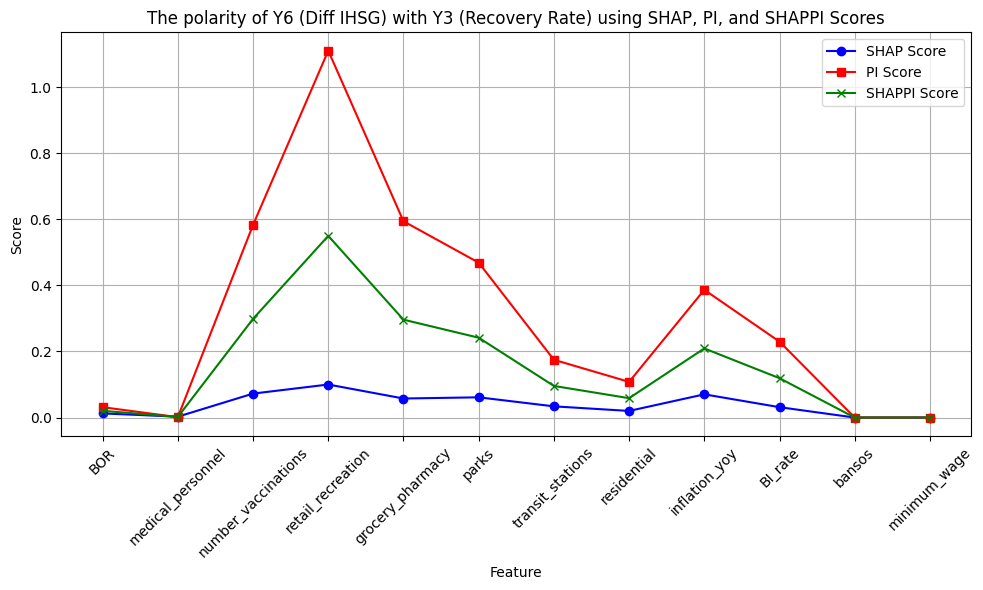

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y3, "The polarity of Y6 (Diff IHSG) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


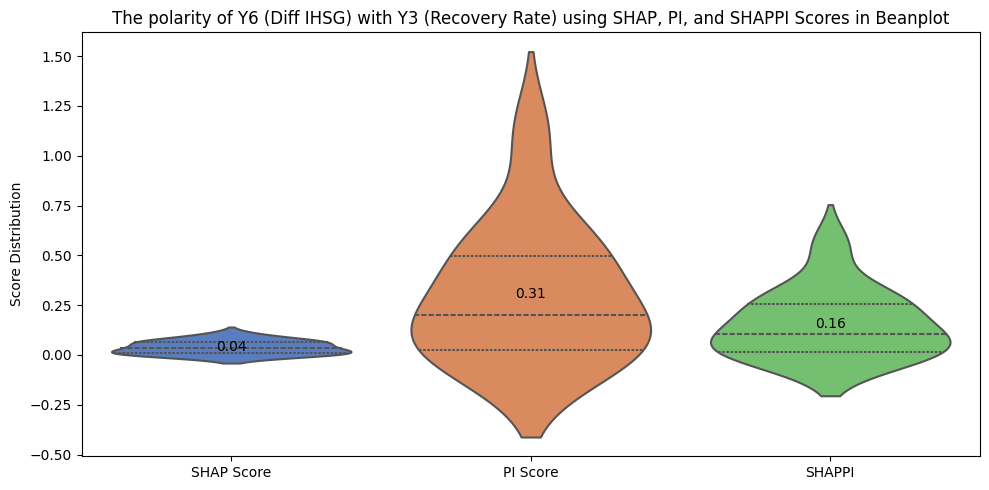

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y3, "The polarity of Y6 (Diff IHSG) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y4:")
pol_anal_Y6_Y4, perm_imp_Y6_Y4 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y4, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y4:
---------------------------------------------------------------
Mean =  [0.03034419 0.00642562 0.17568372 0.2422621  0.13964765 0.14838354
 0.08213429 0.04850331 0.17027108 0.07607185 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y4:")
shappi_Y6_Y4 = analysis_SHAPPI(pol_anal_Y6_Y4, perm_imp_Y6_Y4)
shappi_Y6_Y4

Analysis SHAPPI Y6 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.062345  0.550000
2   number_vaccinations  Positive  0.014412  0.298819
4      grocery_pharmacy  Positive  0.028377  0.296342
5                 parks  Positive  0.018235  0.241738
8         inflation_yoy  Positive  0.021030  0.209224
9               BI_rate  Positive  0.018371  0.119142
6      transit_stations  Positive  0.023541  0.095690
7           residential  Positive  0.003927  0.058636
0                   BOR  Positive  0.005812  0.020393
1     medical_personnel  Positive  0.000554  0.001852
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008554    0.012525  Positive  0.031388   
1     medical_personnel     -0.002633    0.002652  Positive  0.001169   
2   number_vaccinations     -0.009507    0.072518  Positive  0.583220   
3     retail_recreation     -0.031028    0.100000  Positive  1.110640   
4      grocery_pharmacy     -0.032389    0.057643  Positive  0.594238   
5                 parks      0.050571    0.061249  Positive  0.468943   
6      transit_stations     -0.004030    0.033903  Positive  0.174900   
7           residential      0.005105    0.020021  Positive  0.108011   
8         inflation_yoy      0.000087    0.070284  Positive  0.386685   
9               BI_rate      0.010011    0.031401  Positive  0.229774   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005812  0.020393  
1   0.000554  0.001852  
2   0.014412  0.298819  
3   0.062345  0.550000  
4   0.028377  0.296342  
5   0.018235  0.241738  
6   0.023541  0.095690  
7   0.003927  0.058636  
8   0.021030  0.209224  
9   0.018371  0.119142  
10  0.000000  0.000000  
11  0.000000  0.000000

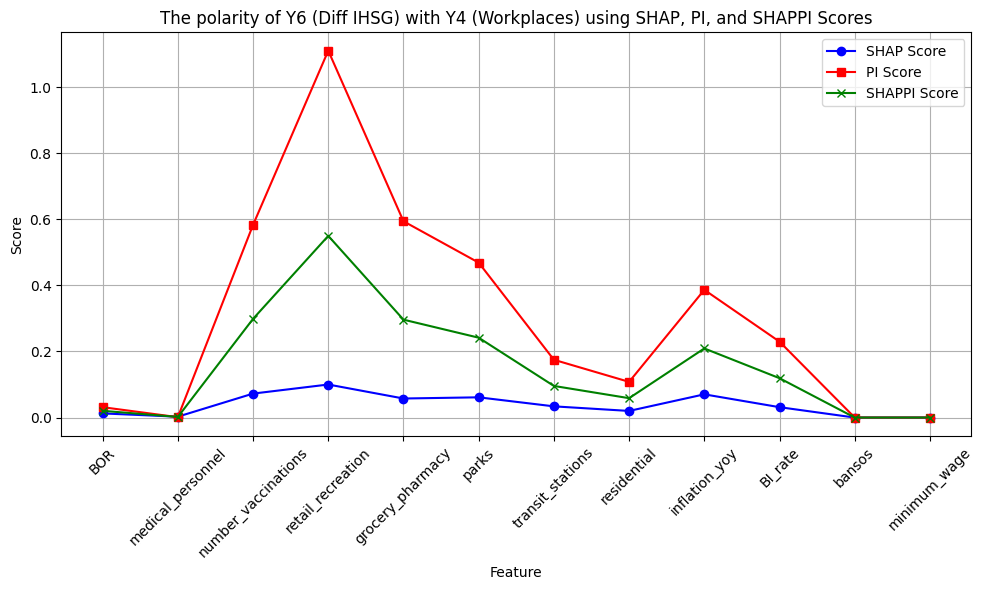

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y4, "The polarity of Y6 (Diff IHSG) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


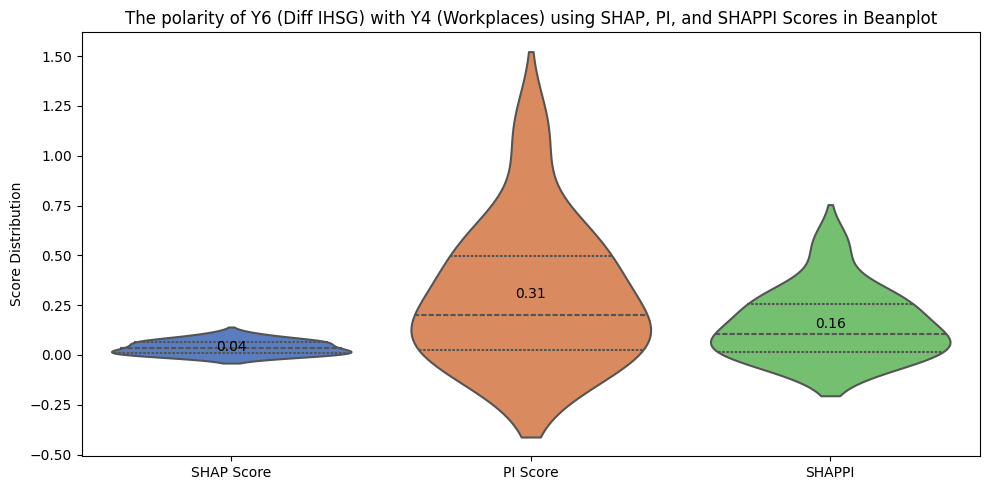

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y4, "The polarity of Y6 (Diff IHSG) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y5:")
pol_anal_Y6_Y5, perm_imp_Y6_Y5 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y5, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y5:
---------------------------------------------------------------
Mean =  [0.03034419 0.00642562 0.17568372 0.2422621  0.13964765 0.14838354
 0.08213429 0.04850331 0.17027108 0.07607185 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y5:")
shappi_Y6_Y5 = analysis_SHAPPI(pol_anal_Y6_Y5, perm_imp_Y6_Y5)
shappi_Y6_Y5

Analysis SHAPPI Y6 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.062345  0.550000
2   number_vaccinations  Positive  0.014412  0.298819
4      grocery_pharmacy  Positive  0.028377  0.296342
5                 parks  Positive  0.018235  0.241738
8         inflation_yoy  Positive  0.021030  0.209224
9               BI_rate  Positive  0.018371  0.119142
6      transit_stations  Positive  0.023541  0.095690
7           residential  Positive  0.003927  0.058636
0                   BOR  Positive  0.005812  0.020393
1     medical_personnel  Positive  0.000554  0.001852
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008554    0.012525  Positive  0.031388   
1     medical_personnel     -0.002633    0.002652  Positive  0.001169   
2   number_vaccinations     -0.009507    0.072518  Positive  0.583220   
3     retail_recreation     -0.031028    0.100000  Positive  1.110640   
4      grocery_pharmacy     -0.032389    0.057643  Positive  0.594238   
5                 parks      0.050571    0.061249  Positive  0.468943   
6      transit_stations     -0.004030    0.033903  Positive  0.174900   
7           residential      0.005105    0.020021  Positive  0.108011   
8         inflation_yoy      0.000087    0.070284  Positive  0.386685   
9               BI_rate      0.010011    0.031401  Positive  0.229774   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005812  0.020393  
1   0.000554  0.001852  
2   0.014412  0.298819  
3   0.062345  0.550000  
4   0.028377  0.296342  
5   0.018235  0.241738  
6   0.023541  0.095690  
7   0.003927  0.058636  
8   0.021030  0.209224  
9   0.018371  0.119142  
10  0.000000  0.000000  
11  0.000000  0.000000

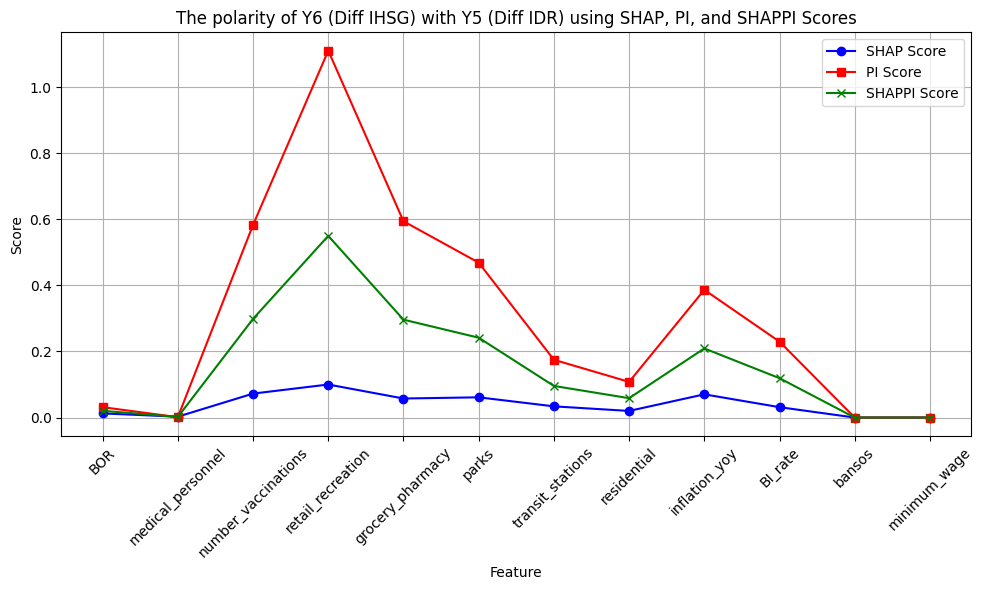

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y5, "The polarity of Y6 (Diff IHSG) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-24-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


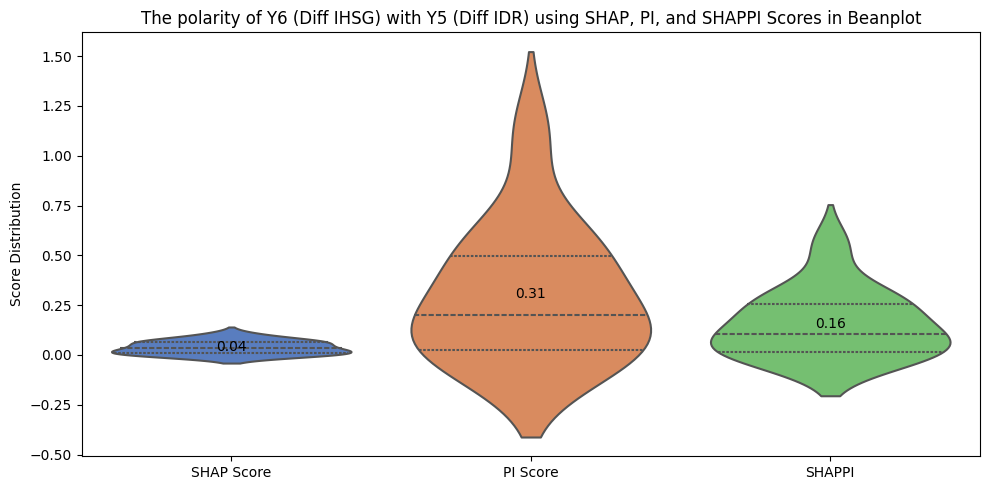

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y5, "The polarity of Y6 (Diff IHSG) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

##**Perhitungan Bobot SHAP, PI, dan SHAPPI**

In [ ]:
def get_score_shap(pol_anal):
  shap_scores = pol_anal[["Feature", "SHAP Score"]]

  shap_scores_ = shap_scores.set_index("Feature").to_dict()["SHAP Score"]
  return shap_scores_

In [ ]:
def get_score_pi(pol_anal):
  pi_scores = pol_anal[["Feature", "PI Score"]]

  pi_scores_ = pi_scores.set_index("Feature").to_dict()["PI Score"]
  return pi_scores_

In [ ]:
def get_score_shappi(shappi):
  # Mengambil hanya kolom "Feature" dan "SHAPPI"
  shappi_scores = shappi[["Feature", "SHAPPI"]]

  # Mengkonversi DataFrame menjadi dictionary
  shappi_scores_ = shappi_scores.set_index("Feature").to_dict()["SHAPPI"]
  return shappi_scores_

In [ ]:
# Menggabungkan seluruh perhitungan SHAP, PI dan SHAPPI yang dilakukan dari Y1-Y2, Y1-Y3, Y1-Y4 dst....sampai Y6-Y4, Y6-Y5
var_Y = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6"]

shap_scores = {
    f"{y1}_{y2}": get_score_shap(globals()[f"pol_anal_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

pi_scores = {
    f"{y1}_{y2}": get_score_pi(globals()[f"pol_anal_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

shappi_scores = {
    f"{y1}_{y2}": get_score_shappi(globals()[f"shappi_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

In [ ]:
def calculate_weight_feature_for_Y(scores, txt_Y, txt):
  # Menggabungkan skor akhir SHAPPI
  combined_scores = {} # inisialisasi awal

  for key, dicts in scores.items():
    if txt_Y in key:
      for key, value in dicts.items():
        if key in combined_scores:
          combined_scores[key] += value
        else:
          combined_scores[key] = value

  # Menghitung total skor dari gabungan tabel
  total_score_combined = sum(combined_scores.values())

  # Menghitung bobot untuk setiap fitur
  weights = {feature: score / total_score_combined for feature, score in combined_scores.items()}

  # Mengurutkan bobot dari yang tertinggi ke yang terendah
  sorted_weights = sorted(weights.items(), key=lambda item: item[1], reverse=True)

  print(f"Weight of Features for [{txt_Y}] from {txt}\n-----------------------------------")
  # Mencetak bobot yang sudah diurutkan
  for feature, weight in sorted_weights:
      print(f"Weight of {feature.upper()}: {weight:.4f}")

  # Menyimpan bobot ke dalam dictionary untuk digunakan dalam fungsi objektif
  weight_dict = {feature: weight for feature, weight in sorted_weights}

  return weight_dict

### Menghitung Bobot SHAP

In [ ]:
Y1_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y1", "SHAP")

Weight of Features for [Y1] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3937
Weight of INFLATION_YOY: 0.1662
Weight of TRANSIT_STATIONS: 0.1185
Weight of PARKS: 0.0882
Weight of RETAIL_RECREATION: 0.0587
Weight of RESIDENTIAL: 0.0548
Weight of GROCERY_PHARMACY: 0.0529
Weight of BOR: 0.0353
Weight of BI_RATE: 0.0302
Weight of MEDICAL_PERSONNEL: 0.0015
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y2_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y2", "SHAP")

Weight of Features for [Y2] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3122
Weight of INFLATION_YOY: 0.2706
Weight of TRANSIT_STATIONS: 0.1096
Weight of PARKS: 0.0782
Weight of GROCERY_PHARMACY: 0.0637
Weight of RETAIL_RECREATION: 0.0535
Weight of RESIDENTIAL: 0.0527
Weight of BOR: 0.0317
Weight of BI_RATE: 0.0265
Weight of MEDICAL_PERSONNEL: 0.0013
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y3_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y3", "SHAP")

Weight of Features for [Y3] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3972
Weight of INFLATION_YOY: 0.1596
Weight of TRANSIT_STATIONS: 0.1198
Weight of PARKS: 0.0887
Weight of RETAIL_RECREATION: 0.0589
Weight of RESIDENTIAL: 0.0535
Weight of GROCERY_PHARMACY: 0.0532
Weight of BOR: 0.0369
Weight of BI_RATE: 0.0307
Weight of MEDICAL_PERSONNEL: 0.0015
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y4_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y4", "SHAP")

Weight of Features for [Y4] from SHAP
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2337
Weight of INFLATION_YOY: 0.1812
Weight of NUMBER_VACCINATIONS: 0.1811
Weight of PARKS: 0.1474
Weight of RESIDENTIAL: 0.0985
Weight of GROCERY_PHARMACY: 0.0654
Weight of RETAIL_RECREATION: 0.0492
Weight of BI_RATE: 0.0247
Weight of BOR: 0.0177
Weight of MEDICAL_PERSONNEL: 0.0012
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y5_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y5", "SHAP")

Weight of Features for [Y5] from SHAP
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2337
Weight of INFLATION_YOY: 0.1812
Weight of NUMBER_VACCINATIONS: 0.1811
Weight of PARKS: 0.1474
Weight of RESIDENTIAL: 0.0985
Weight of GROCERY_PHARMACY: 0.0654
Weight of RETAIL_RECREATION: 0.0492
Weight of BI_RATE: 0.0247
Weight of BOR: 0.0177
Weight of MEDICAL_PERSONNEL: 0.0012
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y6_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y6", "SHAP")

Weight of Features for [Y6] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.2062
Weight of INFLATION_YOY: 0.1687
Weight of RETAIL_RECREATION: 0.1516
Weight of PARKS: 0.1247
Weight of TRANSIT_STATIONS: 0.1113
Weight of GROCERY_PHARMACY: 0.0994
Weight of RESIDENTIAL: 0.0555
Weight of BI_RATE: 0.0517
Weight of BOR: 0.0270
Weight of MEDICAL_PERSONNEL: 0.0040
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


### Menghitung Bobot PI

In [ ]:
Y1_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y1", "PI")

Weight of Features for [Y1] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.6241
Weight of INFLATION_YOY: 0.1066
Weight of RETAIL_RECREATION: 0.0724
Weight of TRANSIT_STATIONS: 0.0504
Weight of PARKS: 0.0480
Weight of GROCERY_PHARMACY: 0.0480
Weight of RESIDENTIAL: 0.0223
Weight of BI_RATE: 0.0202
Weight of BOR: 0.0080
Weight of MEDICAL_PERSONNEL: 0.0001
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y2_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y2", "PI")

Weight of Features for [Y2] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5096
Weight of INFLATION_YOY: 0.2487
Weight of RETAIL_RECREATION: 0.0598
Weight of TRANSIT_STATIONS: 0.0469
Weight of GROCERY_PHARMACY: 0.0419
Weight of PARKS: 0.0413
Weight of RESIDENTIAL: 0.0240
Weight of BI_RATE: 0.0171
Weight of BOR: 0.0107
Weight of MEDICAL_PERSONNEL: 0.0000
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y3_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y3", "PI")

Weight of Features for [Y3] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.6303
Weight of INFLATION_YOY: 0.1004
Weight of RETAIL_RECREATION: 0.0725
Weight of TRANSIT_STATIONS: 0.0504
Weight of PARKS: 0.0479
Weight of GROCERY_PHARMACY: 0.0479
Weight of RESIDENTIAL: 0.0222
Weight of BI_RATE: 0.0200
Weight of BOR: 0.0083
Weight of MEDICAL_PERSONNEL: 0.0001
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y4_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y4", "PI")

Weight of Features for [Y4] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3452
Weight of TRANSIT_STATIONS: 0.1868
Weight of INFLATION_YOY: 0.1365
Weight of PARKS: 0.0910
Weight of GROCERY_PHARMACY: 0.0783
Weight of RETAIL_RECREATION: 0.0774
Weight of RESIDENTIAL: 0.0572
Weight of BI_RATE: 0.0213
Weight of BOR: 0.0063
Weight of MEDICAL_PERSONNEL: 0.0001
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y5_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y5", "PI")

Weight of Features for [Y5] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3954
Weight of RETAIL_RECREATION: 0.1310
Weight of INFLATION_YOY: 0.1291
Weight of PARKS: 0.0948
Weight of GROCERY_PHARMACY: 0.0851
Weight of TRANSIT_STATIONS: 0.0703
Weight of RESIDENTIAL: 0.0432
Weight of BI_RATE: 0.0423
Weight of BOR: 0.0087
Weight of MEDICAL_PERSONNEL: 0.0000
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y6_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y6", "PI")

Weight of Features for [Y6] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3090
Weight of RETAIL_RECREATION: 0.2046
Weight of INFLATION_YOY: 0.1241
Weight of GROCERY_PHARMACY: 0.1164
Weight of PARKS: 0.0993
Weight of TRANSIT_STATIONS: 0.0612
Weight of BI_RATE: 0.0455
Weight of RESIDENTIAL: 0.0311
Weight of BOR: 0.0085
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


### Menghitung Bobot SHAPPI

In [ ]:
Y1_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y1", "SHAPPI")

Weight of Features for [Y1] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5030
Weight of INFLATION_YOY: 0.1138
Weight of RETAIL_RECREATION: 0.0891
Weight of TRANSIT_STATIONS: 0.0863
Weight of PARKS: 0.0707
Weight of GROCERY_PHARMACY: 0.0639
Weight of RESIDENTIAL: 0.0358
Weight of BI_RATE: 0.0265
Weight of BOR: 0.0106
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y2_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y2", "SHAPPI")

Weight of Features for [Y2] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.4265
Weight of INFLATION_YOY: 0.2245
Weight of TRANSIT_STATIONS: 0.0791
Weight of RETAIL_RECREATION: 0.0772
Weight of PARKS: 0.0625
Weight of GROCERY_PHARMACY: 0.0589
Weight of RESIDENTIAL: 0.0354
Weight of BI_RATE: 0.0233
Weight of BOR: 0.0123
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y3_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y3", "SHAPPI")

Weight of Features for [Y3] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5057
Weight of INFLATION_YOY: 0.1093
Weight of RETAIL_RECREATION: 0.0896
Weight of TRANSIT_STATIONS: 0.0868
Weight of PARKS: 0.0710
Weight of GROCERY_PHARMACY: 0.0642
Weight of RESIDENTIAL: 0.0357
Weight of BI_RATE: 0.0266
Weight of BOR: 0.0110
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y4_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y4", "SHAPPI")

Weight of Features for [Y4] from SHAPPI
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2456
Weight of NUMBER_VACCINATIONS: 0.2435
Weight of INFLATION_YOY: 0.1335
Weight of PARKS: 0.1137
Weight of GROCERY_PHARMACY: 0.0870
Weight of RESIDENTIAL: 0.0754
Weight of RETAIL_RECREATION: 0.0727
Weight of BI_RATE: 0.0219
Weight of BOR: 0.0064
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y5_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y5", "SHAPPI")

Weight of Features for [Y5] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3228
Weight of RETAIL_RECREATION: 0.1343
Weight of INFLATION_YOY: 0.1265
Weight of PARKS: 0.1130
Weight of TRANSIT_STATIONS: 0.1005
Weight of GROCERY_PHARMACY: 0.0926
Weight of RESIDENTIAL: 0.0554
Weight of BI_RATE: 0.0453
Weight of BOR: 0.0093
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y6_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y6", "SHAPPI")

Weight of Features for [Y6] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.2558
Weight of RETAIL_RECREATION: 0.2068
Weight of INFLATION_YOY: 0.1242
Weight of GROCERY_PHARMACY: 0.1218
Weight of PARKS: 0.1112
Weight of TRANSIT_STATIONS: 0.0816
Weight of BI_RATE: 0.0487
Weight of RESIDENTIAL: 0.0388
Weight of BOR: 0.0103
Weight of MEDICAL_PERSONNEL: 0.0006
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


## Save Data for Use in the Multi-Object Optimization

In [ ]:
import joblib

data_saved = {
    'X' : X,
    'regrY1' : regrY1,
    'regrY2' : regrY2,
    'regrY3' : regrY3,
    'regrY4' : regrY4,
    'regrY5' : regrY5,
    'regrY6' : regrY6,
    'n_dim_X_features' : n_dim_X_features,
    'n_dim_Y_features' : n_dim_Y_features,
    'X_features_name' : X_features_name,
    'Y_features_name' : Y_features_name,
    'Y1_shap_weights' : Y1_shap_weights,
    'Y2_shap_weights' : Y2_shap_weights,
    'Y3_shap_weights' : Y3_shap_weights,
    'Y4_shap_weights' : Y4_shap_weights,
    'Y5_shap_weights' : Y5_shap_weights,
    'Y6_shap_weights' : Y6_shap_weights,
    'Y1_pi_weights' : Y1_pi_weights,
    'Y2_pi_weights' : Y2_pi_weights,
    'Y3_pi_weights' : Y3_pi_weights,
    'Y4_pi_weights' : Y4_pi_weights,
    'Y5_pi_weights' : Y5_pi_weights,
    'Y6_pi_weights' : Y6_pi_weights,
    'Y1_shappi_weights' : Y1_shappi_weights,
    'Y2_shappi_weights' : Y2_shappi_weights,
    'Y3_shappi_weights' : Y3_shappi_weights,
    'Y4_shappi_weights' : Y4_shappi_weights,
    'Y5_shappi_weights' : Y5_shappi_weights,
    'Y6_shappi_weights' : Y6_shappi_weights,
}

joblib.dump(data_saved, folder_drive + 'data_saved2.job')

['/content/drive/MyDrive/Dokument S3 Bismillah/Data/data_saved2.job']